<a href="https://colab.research.google.com/github/itssameerkhaan/Cardiovascular_risk_predictioN/blob/main/cardiovascular_risk_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **`Cardiovascular Risk prediction`**



##### **Project Type**    - Classification
##### **Contribution**    - Individual / sameer khan


# **Project Summary -**

**Congenital heart disease** is one or more problems with the heart's structure that exist since birth. Congenital means that you're born with the condition. Congenital heart disease in adults and children can change the way blood flows through the heart.

There are many different types of congenital heart defects. This article focuses on congenital heart disease in adults.

Some types of congenital heart disease may be mild. But complex defects may cause life-threatening complications. However, advances in diagnosis and treatment continue to improve survival for those with congenital heart disease.

People with congenital heart disease need lifelong medical care. Treatment may include regular checkups (watchful waiting), medications or surgery. If you have adult congenital heart disease, ask your health care provider how often you need a checkup.

An Organized Dataset of individuals had been selected Keeping in mind their history of heart problems and in accordance with other medical conditions. Heart disease are the diverse conditions by which the heart is affected. According to World Health Organization (WHO), the greatest number of deaths in middle aged people are due to Cardiovascular diseases. We take a data source which is comprised of medical history of 3390 different patient of different age groups. This dataset gives us the much-needed information i.e. the medical attributes such as age, resting blood pressure, fasting sugar level etc. of the patient that helps us in detecting the patient that is diagnosed with any heart disease or not. This dataset contains 17 medical attributes of 3390 patients that helps us detecting if the patient is at risk of getting a heart disease or not and it helps us classify patients that are at risk of having a heart disease and that who are not at risk.


# **GitHub Link -**

https://github.com/itssameerkhan/Cardiovascular_risk_predictioN/tree/main

# **Problem Statement**


* Cardiovascular diseases (CVDs) are the major cause of mortality worldwide. According to WHO, 17.9 million people died from CVDs in 2019, accounting for 32% of all global fatalities.
* Though CVDs cannot be treated, predicting the risk of the disease and taking the necessary precautions and medications can help to avoid severe symptoms and, in some cases, even death.
* As a result, it is critical that we accurately predict the risk of heart disease in order to avert as many fatalities as possible.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.tools import make_subplots
from scipy.stats import shapiro
from scipy.stats import spearmanr
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_predict,cross_val_score
from prettytable import PrettyTable
! pip install scikit-plot==0.3.7
import scikitplot as skplt
! pip install shap
import shap
from shap import TreeExplainer, Explanation
plt.style.use('ggplot')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.5 MB/s eta 0:00:00


In [2]:
from sklearn.metrics import ConfusionMatrixDisplay

### Dataset Loading

In [3]:
! git clone https://github.com/itssameerkhan/Cardiovascular_risk_predictioN.git

Cloning into 'Cardiovascular_risk_predictioN'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 91.52 KiB | 1.20 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [4]:
# Load Dataset
dataset=pd.read_csv('/content/Cardiovascular_risk_predictioN/data_cardiovascular_risk.csv')

### Dataset First View

In [5]:
# Dataset First Look
dataset.sample(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
1742  1742   47        1.0   M        YES        15.0     0.0   
1669  1669   61        2.0   F        YES         1.0     0.0   
3005  3005   39        4.0   F         NO         0.0     0.0   
3086  3086   54        3.0   F         NO         0.0     0.0   
962    962   50        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1742                0             0         0    206.0  125.0   72.0  21.14   
1669                0             1         0    326.0  200.0  104.0  38.46   
3005                0             0         0    181.0  112.0   71.0  21.80   
3086                0             0         0    286.0  110.0   74.0  26.28   
962                 0             0         0    250.0  109.0   70.0  20.74   

      heartRate  glucose  TenYearCHD  
1742       80.0     74.0           0  
1669       57.0     78.0           0  
3005       77.0     67.0           0  
3086       65.0     90.0           0  
962        75.0     77.0           0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print("Number of row :-",dataset.shape[0])
print("Number of columns :-",dataset.shape[1])

Number of row :- 3390
Number of columns :- 17


### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print("Numbr of duplicate value :-  ",dataset.duplicated().sum())

Numbr of duplicate value :-   0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

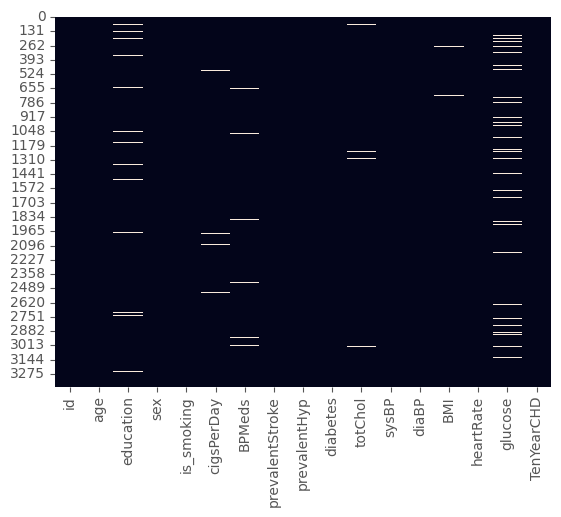

In [10]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(),cbar=False)

### What did you know about your dataset?

In this dataset , total number of Rows are 3390 and columns are 17 . This dataset have total 15 numeric columns and 2 (sex, is_smoking) are objective columns. zero '0' duplicate value. Total number of null value is 510 and { education - 87, cigsperDay-22, BPMeds-44, totChol-38, BMI-14, heartRate-1, glucose-304}

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
dataset.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

1. id= identity
2. age= how old you are.
3. education= the teaching or training of people.
4. sex= male or female (1= male, 0=female).
5. is_smoking= smoking or not (1= smoking, 0= not smoking).
6. cigsPerDay= cigarette consumption in a day.
7. BPMeds= whether taking BP meds or not.
8. prevalentStroke= petient have history of stroke.
9. prevalentHyp= patient have history of hypertension.
10. diabetes= patient have diabetes or not.
11. totChol= cholestrol measure.
12. sysBP= systolic bloood pressure.
13. diaBP= disystolic blood pressure.
14. BMI= body mass index.
15. heartRate= heart Rate meassure.
16. glucose= body glucose meassure.
17. TenYearCHD= 10-year risk of coronary heart disease have or not.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

**`Here i am going to copy full dataset into df because i do analysis and data manipulation in df.`**

In [14]:
# Write your code to make your dataset analysis ready.
df=dataset.copy()


**`Droping the education columns`**

1. we all know that the education is not any factor through TenyearCHD (heart desies) is going to affected.
2. this show that the education is not correlated with TenYearCHD therefore i drope the education columns.

In [15]:
df[['education','TenYearCHD']].corr()

education  TenYearCHD
education    1.000000   -0.052751
TenYearCHD  -0.052751    1.000000

In [16]:
df.drop(columns=['education'],inplace=True)

In [17]:
df.columns

Index(['id', 'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**`Creating a new column 'sys-dia'`**

Here we are going to create a column 'sys-dia' which store the fraction of sysBP and diaBP (sys-dia=sysBP/diaBP). this makes the analysis easear .

Here the boudary of normal value is (this is the maximum normal value of sysBP
 :120/ the maximum normal value of diaBP  :80 = maximum normal value of sys-dia is  :1.5)

In [18]:
#creating the new column sys-dia.
df['sys-dia']=round(df['sysBP']/df['diaBP'],2)

### What all manipulations have you done and insights you found?

1. Drop the education column.
2. Creat a new column name is sys-dia which store the fraction of sysBP and diaBP.

I do not see any other manipulation in this dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  **`: Nmber of paitents who having TenYearCHD or Not having.`**

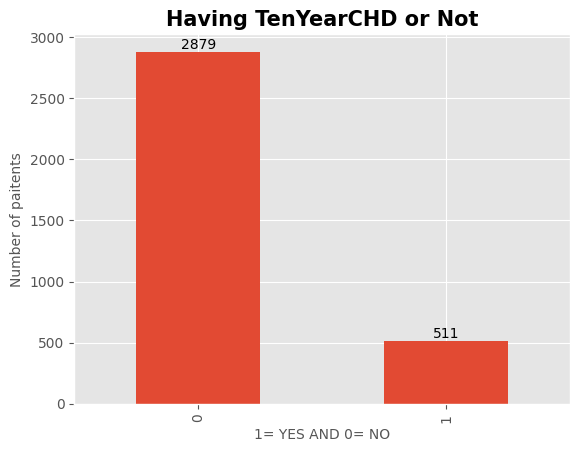

In [19]:
# Chart - 1 visualization code
#what is the number of paitent who have TenYearCHD problem and who have not .
ax=df.TenYearCHD.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Having TenYearCHD or Not',fontsize=15,fontweight='bold')
plt.xlabel('1= YES AND 0= NO',fontsize=10)
plt.ylabel('Number of paitents',fontsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

This shows the number of paitent who have TenYearCHD problem and who have not .

##### 2. What is/are the insight(s) found from the chart?

Out of 3300 paitents 511 having TenYearCHD problem and 2879 are away from this disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The ratio of having disease and ant not having disease is 5:28. this show that not having disease is very high. this show the positive impact.

#### Chart - 2 : **`Range percentage of age having disease.`**

In [20]:
# Chart - 2 visualization code
data_TYCHD=df[(df.TenYearCHD==1)]
name=['AGE(40<age<=50)','AGE(50<age<=60)','AGE(60<age<=70)','AGE(age<40)']
per=[round(len(data_TYCHD[(df.age>40)&(df.age<=50)])/len(data_TYCHD)*100,2),
     round(len(data_TYCHD[(df.age>50)&(df.age<=60)])/len(data_TYCHD)*100,2),
     round(len(data_TYCHD[(df.age>60)&(df.age<=70)])/len(data_TYCHD)*100,2),
     round(len(data_TYCHD[(df.age<40)])/len(data_TYCHD)*100,2)]

<ipython-input-20-f36d13adbe75>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-20-f36d13adbe75>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-20-f36d13adbe75>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-20-f36d13adbe75>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



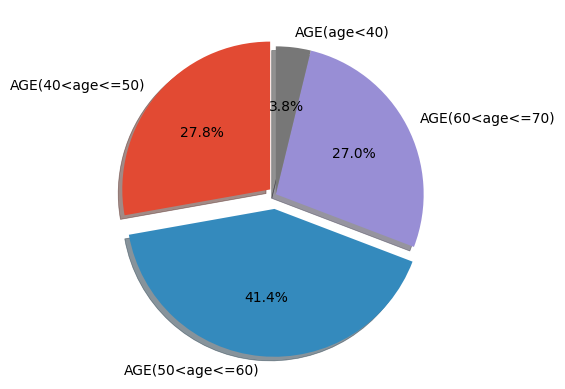

In [21]:
plt.pie(per,labels=name,explode=(0.05,0.1,0,0),autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

##### 1. Why did you pick the specific chart?

This chart show the range of age whcih have how many parcentage of paitents having disease.

##### 2. What is/are the insight(s) found from the chart?

this chart shows that the age between 50 and 60 having 41.5% of total number of paitents and between 60 and 70 26.8% and bellow 40 is 38% and above 70 is 0%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

YES because this chart show that the persion who is in 50s and 60s having high risk in TenYearCHD disease.

#### Chart - 3 : **`Number of people who smoke or don't smoke.`**

In [22]:
# Chart - 3 visualization code
ind=df.is_smoking[df.TenYearCHD==0].value_counts().index
smok_value=df.is_smoking[df.TenYearCHD==0].value_counts().values
ind2=df.is_smoking[df.TenYearCHD==1].value_counts().index
smok_value2=df.is_smoking[df.TenYearCHD==1].value_counts().values

Text(1.6, 1210, 'Where TenYearCHD==1')

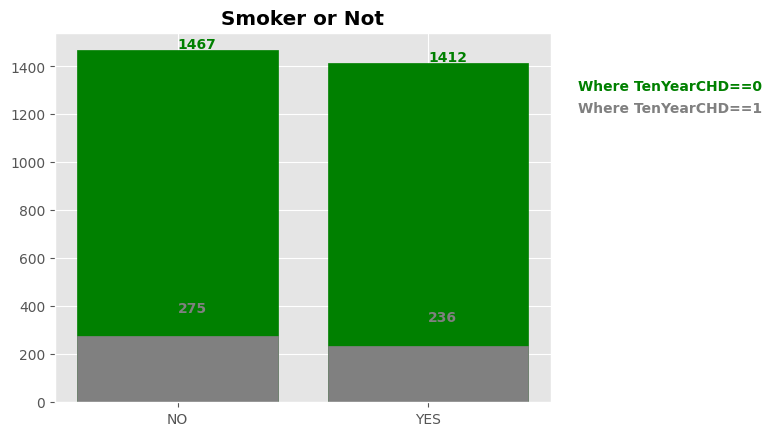

In [23]:
fig, ax=plt.subplots()
fig1=ax.bar(ind,smok_value)
fig1[0].set_color('green')
fig1[1].set_color('green')
for index,value in enumerate(smok_value):
  ax.text(x=index,y=value+10,s=value,fontdict={'color':'green','fontweight':'bold'})
fig2=ax.bar(ind,smok_value2)
fig2[0].set_color('gray')
fig2[1].set_color('gray')
for index2,value2 in enumerate(smok_value2):
  ax.text(x=index2,y=value2+100,s=value2,fontdict={'color':'gray','fontweight':'bold'})
plt.title('Smoker or Not',fontweight='bold')
ax.text(x=1.6,y=1300,s='Where TenYearCHD==0',fontdict={'color':'green','fontweight':'bold'})
ax.text(x=1.6,y=1210,s='Where TenYearCHD==1',fontdict={'color':'gray','fontweight':'bold'})

##### 1. Why did you pick the specific chart?

Number of people who smoke or don't smoke.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that the number of patients who smoke and also having **TenYearCHD==yes** .
1. YES : 236 people are smokers and also they have tenYearCHD.
2. NO : 275 people are not smokers and but they have tenYearCHD.


---
Here we can see that the number of people who smoke and dont smoke and also not having **TenYearCHD==no**
1. YES : 1412 people are smoker .
2. NO : 1467 people are not smoker.



this chart show that 274 of patients are smoker and 234 are not .

Smoking increase the chances of getting TenYearCHD disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, because we know through this chart , smoking is not good for our helth.

#### Chart - 4  : **`This chart shows what percantage of petaint are smoking how many cigarettes`**

In [24]:
# Chart - 4 visualization code
CHD_data=df[dataset.TenYearCHD==1]
cig_range=['More than 20','More than 10','More than 5','More than 0']
cig_value=[len(CHD_data[CHD_data.cigsPerDay>=20]),len(CHD_data[(CHD_data.cigsPerDay>=10)&(CHD_data.cigsPerDay<20)]),len(CHD_data[(CHD_data.cigsPerDay>=5)&(CHD_data.cigsPerDay<10)]),len(CHD_data[(CHD_data.cigsPerDay>0)&(CHD_data.cigsPerDay<5)])]

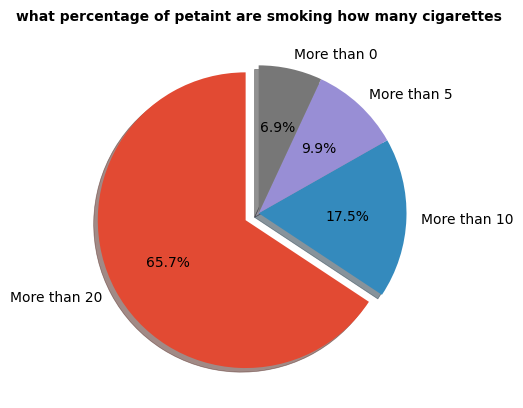

In [25]:
plt.pie(cig_value,labels=cig_range,autopct='%1.1f%%',
        shadow=True, startangle=90,explode=(0.1,0,0,0))
plt.title('what percentage of petaint are smoking how many cigarettes',fontsize=10,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows what percantage of petaint are smoking how many cigarettes

##### 2. What is/are the insight(s) found from the chart?

this chart shows thata the percantage fo petaint who conssume how many cigarettes in a daay.
1. 66.2 % of petaint conssume more than 20 cigarettes in a day.
2. 17.2 % of petaint conssume mote than 10 cigarettes in a day.
3. 9.9 % of petaint conssume more than 5 cigarettes in a day.
4. 6.9 % of petaint conssume mote than 1 to 4 cigarettes in a day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More cigarettes more chance to infected by heart dessies.

#### Chart - 5 : **`Number of people who are taking or not taking Blood Pressure medicine `**

In [26]:
# Chart - 5 visualization code
BPM_ind=df.BPMeds.value_counts().index
BPM_value=df.BPMeds.value_counts().values

Text(0.5, 0, '1=YES , 0=NO')

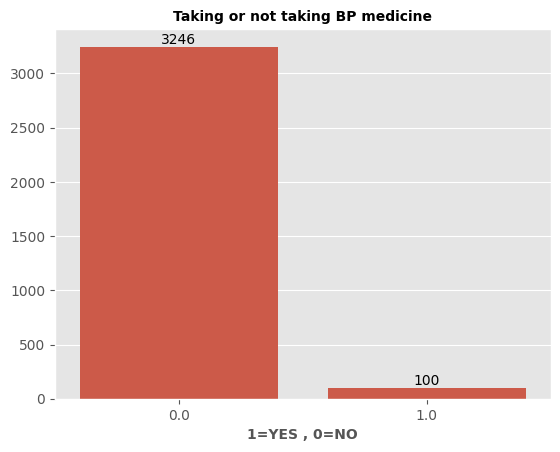

In [27]:
ax=sns.barplot(x=BPM_ind,y=BPM_value)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Taking or not taking BP medicine',fontsize=10,fontweight='bold')
ax.set_xlabel('1=YES , 0=NO',fontsize=10,fontweight='bold')

##### 1. Why did you pick the specific chart?

This chart shows the number of those people who are taking or not taking blood pressure medicine.

##### 2. What is/are the insight(s) found from the chart?

Here we can clearly see that out of 3389 only 121 people has taking the BP medicine and 3268 are not taking any kind of medicine .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This columns not have a balance data. therefore it not afecting the resuslt efectevly.

#### Chart - 6 : **`This show the prevalent hypertension and strok where TenYearCHD==NO and TenYearCHD==YES`**

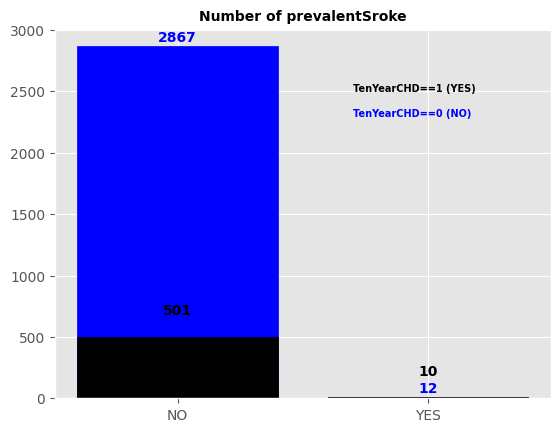

In [28]:
# Chart - 6 visualization code
stroke_name=['NO','YES']
stroke_value=df.prevalentStroke[df.TenYearCHD==0].value_counts().values
CHD_stroke_value=df.prevalentStroke[df.TenYearCHD==1].value_counts().values
fig, ax=plt.subplots()
fig=ax.bar(stroke_name,stroke_value)
for index,data in enumerate(stroke_value):
  ax.text(x=index, y=data+40,s=data,ha='center',fontdict={'color':'blue','fontweight':'bold'})
fig[0].set_color('blue')
fig[1].set_color('blue')
fig2=ax.bar(stroke_name,CHD_stroke_value)
for index,data in enumerate(CHD_stroke_value):
  ax.text(x=index, y=data+180,s=data,ha='center',fontdict={'color':'black','fontweight':'bold'})
fig2[0].set_color('black')
fig2[1].set_color('black')
ax.text(x=0.7,y=2500,s='TenYearCHD==1 (YES)',fontdict={'color':'black','fontweight':'bold','fontsize':7})
ax.text(x=0.7,y=2300,s='TenYearCHD==0 (NO)',fontdict={'color':'blue','fontweight':'bold','fontsize':7})
plt.title('Number of prevalentSroke',fontsize=10,fontweight='bold')
plt.show()

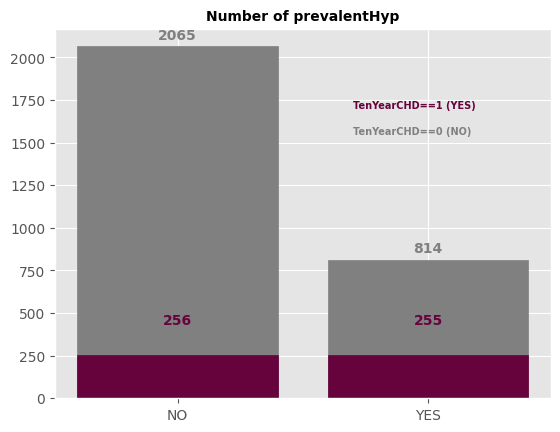

In [29]:
stroke_name=['NO','YES']
hyp_value=df.prevalentHyp[df.TenYearCHD==0].value_counts().values
CHD_hyp_value=df.prevalentHyp[df.TenYearCHD==1].value_counts().values
fig, ax=plt.subplots()
fig=ax.bar(stroke_name,hyp_value)
for index,data in enumerate(hyp_value):
  ax.text(x=index, y=data+40,s=data,ha='center',fontdict={'color':'gray','fontweight':'bold'})
fig[0].set_color('gray')
fig[1].set_color('gray')
fig2=ax.bar(stroke_name,CHD_hyp_value)
for index,data in enumerate(CHD_hyp_value):
  ax.text(x=index, y=data+180,s=data,ha='center',fontdict={'color':'#66023C','fontweight':'bold'})
fig2[0].set_color('#66023C')
fig2[1].set_color('#66023C')
ax.text(x=0.7,y=1700,s='TenYearCHD==1 (YES)',fontdict={'color':'#66023C','fontweight':'bold','fontsize':7})
ax.text(x=0.7,y=1550,s='TenYearCHD==0 (NO)',fontdict={'color':'gray','fontweight':'bold','fontsize':7})
plt.title('Number of prevalentHyp',fontsize=10,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

This show the prevalent hypertension and strok where TenYearCHD==NO and TenYearCHD==YES

##### 2. What is/are the insight(s) found from the chart?

**PREVALENT STROKE**

Number of people where prevalent stroke is Yes or No in dataset where **TenYearCHD==0 (no)**
1. 2867 people are not having any prevalent stroke.
2. only 12 people are having prevalent stroke.

Number of people where prevalent stroke is Yes or No in dataset where **TenYearCHD==1 (yes)**
1. 501 people are not having any prevalent stroke.
2. 10 peaple are having prevalent stroke.
---
**PREVALENT HYPERTENSION**

Number of people where prevalent hypertension is Yes or No in dataset where **TenYearCHD==0 (no)**
1. 2065 people are not havind any prevalent hypertension.
2. 814 people are having prevalent hypertension.

Number of people where prevalent hypertension is yes or no in dataset where **TenYearCHD==1 (yes)**
1. 256 people are not having prevalent hypertension.
2. 255 people are having prevalent hypertension.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, prevalent hypertension is higher than prevalent stroke in dataset where TenYearCHD ==1 (yes)


#### Chart - 7 : **`Number of diabetic petiets, who have glucose lavel greater or less than 125 and also having TenYearCHD==1(YES).`**

In [30]:
# Chart - 7 visualization code
#ploting number of the diabetic people
dia_ind=['NO','YES']
dia_value=df.diabetes.value_counts().values
fig, ax=plt.subplots()
fig=ax.bar(dia_ind,dia_value)
for index,value in enumerate(dia_value):
  ax.text(x=index,y=value+30,s=value)
fig[0].set_color('green')
fig[1].set_color('red')
plt.title('Number of diabetic or non diabetic people',fontsize=10,fontweight='bold')
plt.show()

In [31]:
per_label=['TenYearCHD==1(YES) and glucose>=125','TenYearCHD==1(YES) and glucose<=125']
per_value=[len(df[(df.diabetes==1)&(df.TenYearCHD==1)&(df.glucose>=125)]),len(df[(df.glucose<=125)&(df.diabetes==1)&(df.TenYearCHD==1)])]
plt.pie(per_value,labels=per_label,autopct='%1.1f%%',explode=(0.1,0),shadow=0.5)
plt.title('Percentage of diabetic petaints',fontsize=10,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Number of diabetic petiets who have glucose lavel greater or less than 125 and also having TenYearCHD==1(YES).

##### 2. What is/are the insight(s) found from the chart?

1. We can see that out of 3390 only 87 people are suffering from diabeteis.
2. In 87, 81.2 % of peaople are having glucose lavel greater tha 125 and also having TenYearCHD == 1(YES) . And only 18.8 % of people are having less than 125 glucose lavel.

Note: if glucose lavel is greater than 125 than the persion are suffering from diabetes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

YEs: this idicates that id any people have more tha 125 glucose lavel than it have 88% chance to suffer from diabetes.

#### Chart - 8 : **`Variation in cholestrole and number of people whose cholestrole is greater than 200 and also suffering from CHD.`**

In [32]:
#this show the variation in Cholestrole.
fig.ax=plt.subplots(figsize=(15,5))
df.totChol[df.TenYearCHD==1].plot()
plt.title('This show the variation in Cholesterol ', fontsize=13,fontweight='bold')
plt.show()

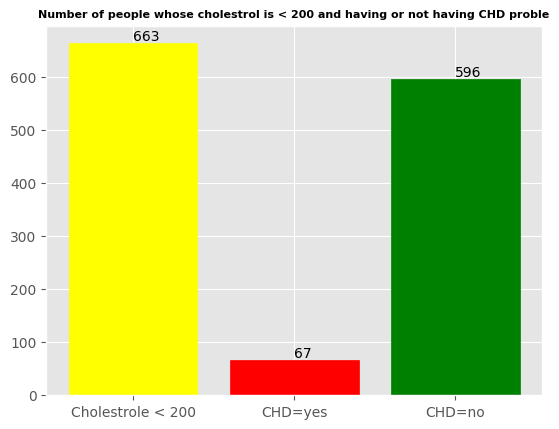

In [33]:
# Chart - 8 visualization code
#this show the number of people whose cholestrole is greater than 200 and suffering from CHD.
chol_ind=['Cholestrole < 200','CHD=yes','CHD=no']
chol_value=[len(df.totChol[df.totChol<200]),len(df.totChol[(df.totChol<200)&(df.TenYearCHD==1)]),len(df.totChol[(df.totChol<200)&(df.TenYearCHD==0)])]
fig, ax=plt.subplots()
figure=ax.bar(chol_ind,chol_value)
for index,value in enumerate(chol_value):
  ax.text(x=index,y=value+5,s=value)
figure[0].set_color('yellow')
figure[1].set_color('red')
figure[2].set_color('green')
plt.title('Number of people whose cholestrol is < 200 and having or not having CHD proble',fontsize=8,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Variation in cholestrole and number of people whose cholestrole is greater tha 200 and also suffering from CHD.

##### 2. What is/are the insight(s) found from the chart?

1. In the first chart we can see that the maximume cholestrole level is aprox 600 and minimum is 100.
2. Here we can see that, there is 633 people's Cholestrole value is less than 200 and out of 633, 596 are not suffering from CHD and only 67 people is suffering from CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes: here we oberve that the CHD is not much affected by cholestrole is no

#### Chart - 9 : **`Here we plot the BLOOD PRESSURE with CHD.`**

**NOTE:** Heigh Blood Pressure means BP(sysBP/diaBP) is greater than sys=140/dia=90(1.55)

HEIGH BP =sysBP/diaBP > 1.55

NORMAL BP =sysBP/diaBP < 1.55

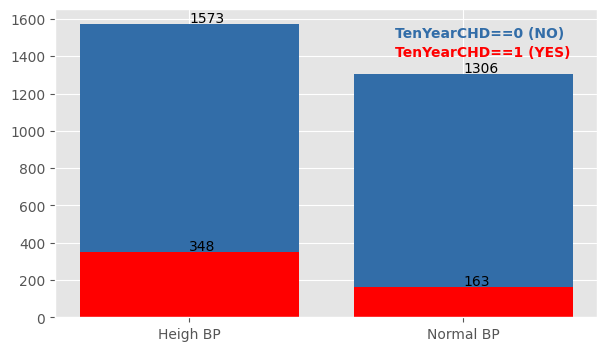

In [34]:
# Chart - 9 visualization code
bp_label=['Heigh BP','Normal BP']
bp_value=[len(df[(df.TenYearCHD==0)&(df['sys-dia']>(140/90))]),len(df[(df.TenYearCHD==0)&(df['sys-dia']<(140/90))])]
bp_value2=[len(df[(df.TenYearCHD==1)&(df['sys-dia']>(140/90))]),len(df[(df.TenYearCHD==1)&(df['sys-dia']<(140/90))])]
fig, ax=plt.subplots(figsize=(7,4))
fig1=ax.bar(bp_label,bp_value,color='#326da8')
fig1=ax.bar(bp_label,bp_value2,color='red')
for index, value in enumerate(bp_value):
  ax.text(x=index,y=value+10,s=value)
for index, value2 in enumerate(bp_value2):
  ax.text(x=index,y=value2+10,s=value2)
ax.text(x=0.75,y=1500,s='TenYearCHD==0 (NO)',fontdict={'color':'#326da8','fontweight':'bold'})
ax.text(x=0.75,y=1400,s='TenYearCHD==1 (YES)',fontdict={'color':'red','fontweight':'bold'})
plt.show()

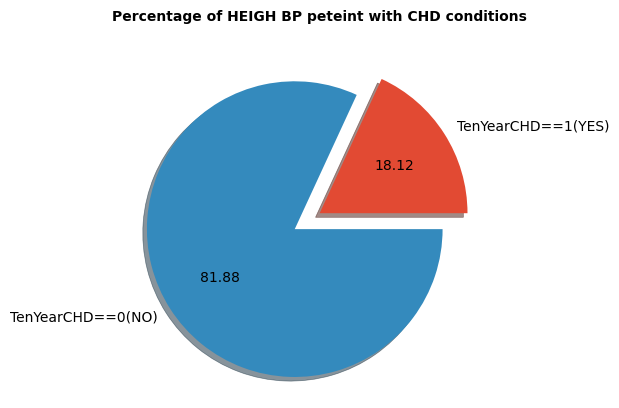

In [35]:
per_bp_ind=['TenYearCHD==1(YES)','TenYearCHD==0(NO)']
per_bp_val=[len(df['sys-dia'][(df['sys-dia']>(140/90))&(df.TenYearCHD==1)]),len(df['sys-dia'][(df['sys-dia']>(140/90))&(df.TenYearCHD==0)])]
plt.pie(per_bp_val,labels=per_bp_ind,autopct='%.2f',explode=(0,0.2),shadow=0.4)
plt.title('Percentage of HEIGH BP peteint with CHD conditions',fontsize=10,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Here we plot the BLOOD PRESSURE with CHD.

##### 2. What is/are the insight(s) found from the chart?

**TenYearCHD == 0 (NO)**
1. There is 1573 high blood pressure peteints.
2. And 1306 Normal blood pressure peteints.

**TenYearCHD == 1 (YES)**
1. Here 348 people are high blood pressure and have CHD problem.
2. only 163 people are Normal blood pressure and not having CHD problem.

**Percentage of Heigh BP peteints with CHD conditions.**
1. There is 81.83 % of people have high Blood Pressure but not having CHD problem.
2. only 18.12 % pf people are high blood pressure and also having CHD problem in itiere dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

YES.

#### Chart - 10 : **`Here we can see the number of peteint with Boody Mass Index and CHD.`**

**NOTE** : Obesity, assessed using body mass index (BMI) >30 kg/m2, is an established risk factor for development of coronary heart disease (CHD) in healthy individuals.

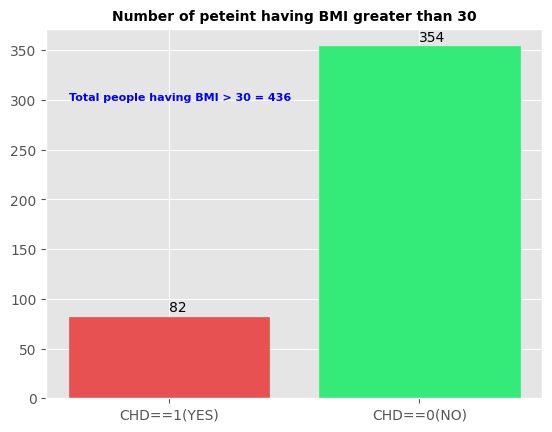

In [36]:
# Chart - 10 visualization code
bmi_label=['CHD==1(YES)','CHD==0(NO)']
bmi_value=[len(df[(df.BMI>30)&(df.TenYearCHD==1)]),len(df[(df.BMI>30)&(df.TenYearCHD==0)])]
fig, ax=plt.subplots()
fig1=ax.bar(bmi_label,bmi_value)
fig1[0].set_color('#e85151')
fig1[1].set_color('#34eb7a')
for index,value in enumerate(bmi_value):
  ax.text(x=index,y=value+5,s=value)
ax.text(x=-0.4,y=300,s=f"Total people having BMI > 30 = {len(df[df.BMI>30])}",fontdict={'fontsize':8,'fontweight':'bold','color':'blue'})
plt.title('Number of peteint having BMI greater than 30',fontsize=10,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Here we can see the number of peteint with Boody Mass Index and CHD.

##### 2. What is/are the insight(s) found from the chart?

There is 436 people having BOODY MASS INDEX greater than 30 and in 436 only 82 are suffering from CHD and 354 are not suffering from CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

YES.

#### Chart - 11 : **`Number of CHD patients who are in danger due to heart rate.`**

**NOTE**: Heart rate of <70 or ≥80 bpm was associated with an elevated risk of CV death among CHD patients.

In [37]:
df2=df[df.TenYearCHD==1]
hrtr_label=['In danger','Out of danger']
hrtr_value=[len(df2[(df2.heartRate<70)|(df.heartRate>80)]),len(df2[(df2.heartRate>70)&(df.heartRate<80)])]

<ipython-input-37-a464345b1afb>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-37-a464345b1afb>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



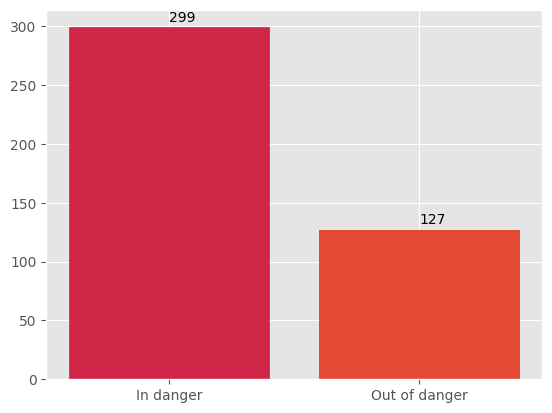

In [38]:
# Chart - 11 visualization code
fig,ax=plt.subplots()
fig1=ax.bar(hrtr_label,hrtr_value)
fig1[0].set_color('#cf2547')
for ind,value in enumerate(hrtr_value):
  ax.text(x=ind,y=value+5,s=value)
plt.show()

##### 1. Why did you pick the specific chart?

Number of CHD patients who are in danger due to heart rate.

##### 2. What is/are the insight(s) found from the chart?

1. Here 299 CHD patients are in danger condition because they have heart rate <70 or >=80 bpm.
2. And only 127 patients are out of danger with heart rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes: becouse we know about the heart rate .

#### Chart - 12 : **`Number of Hypertension and Stroke with Age.`**

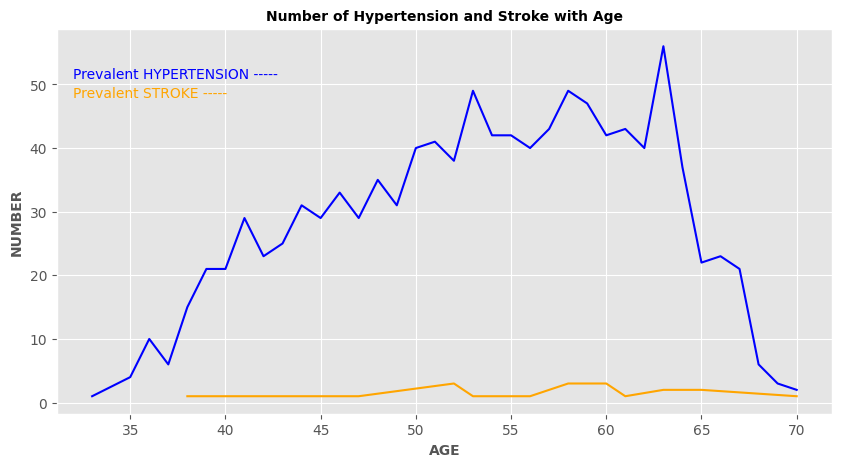

In [39]:
# Chart - 12 visualization code
hyp_label=df.age[df.prevalentHyp==1].value_counts().sort_index().index
hyp_values=df.age[df.prevalentHyp==1].value_counts().sort_index().values
stroke_label=df.age[df.prevalentStroke==1].value_counts().sort_index().index
stroke_values=df.age[df.prevalentStroke==1].value_counts().sort_index().values
fig,ax=plt.subplots(figsize=(10,5))
fig1=ax.plot(hyp_label,hyp_values,color='blue')
fig2=ax.plot(stroke_label,stroke_values,color='orange')
ax.text(x=32,y=51,s="Prevalent HYPERTENSION -----",fontdict={'color':'blue'})
ax.text(x=32,y=48,s="Prevalent STROKE -----",fontdict={'color':'orange'})
plt.title('Number of Hypertension and Stroke with Age',fontsize=10,fontweight='bold')
plt.xlabel('AGE',fontsize=10,fontweight='bold')
plt.ylabel('NUMBER',fontsize=10,fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

Number of Hypertension and Stroke with Age.

##### 2. What is/are the insight(s) found from the chart?

1. Before the age of 35 the Hypertension value is nulll and after the age of 70 Hypertension value is null. And the hypertension is started from the age of 35 and end with the age 75 . And it is maximum in the age of 50 to 60 and before 50 the hypertension is gradually increasing the after 65 ut gradually dicreasing.
2. The chance of attack of Stroke is between age 45 to 65. And the age if 50 to 60 number of stroke is maximum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes: because we know about the rage of age where the number of hypertension and stroke is maximum and munimum.

#### Chart - 13 : **`The relation between age and diabetes peteints.`**

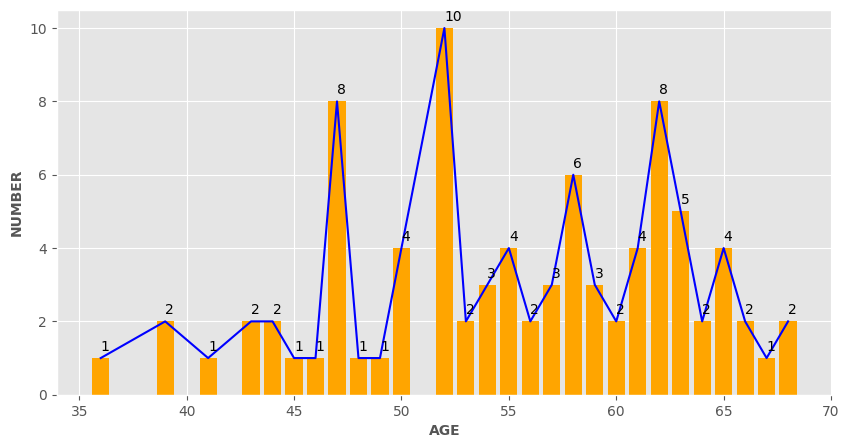

In [40]:
# Chart - 13 visualization code
d_label=df.age[df.diabetes==1].value_counts().sort_index().index
d_values=df.age[df.diabetes==1].value_counts().sort_index().values
fig,ax=plt.subplots(figsize=(10,5))
fig1=ax.plot(d_label,d_values,color='blue')
fig2=ax.bar(d_label,d_values,color='orange')
for index,value in zip(d_label,d_values):
  ax.text(x=index,y=value+0.2,s=value)
# ax.text(x=32,y=51,s="Prevalent HYPERTENSION -----",fontdict={'color':'blue'})
# ax.text(x=32,y=48,s="Prevalent STROKE -----",fontdict={'color':'orange'})
# plt.title('Number of Hypertension and Stroke with Age',fontsize=10,fontweight='bold')
plt.xlabel('AGE',fontsize=10,fontweight='bold')
plt.ylabel('NUMBER',fontsize=10,fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

This show the relation between age and diabetes peteints.

##### 2. What is/are the insight(s) found from the chart?

The maximum number of diabetic peteints are in the age of 47,52,5,8,62 and the age between 45 to 65.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes :

#### Chart - 14 -**` Correlation Heatmap`**

<ipython-input-41-85dacae0f300>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



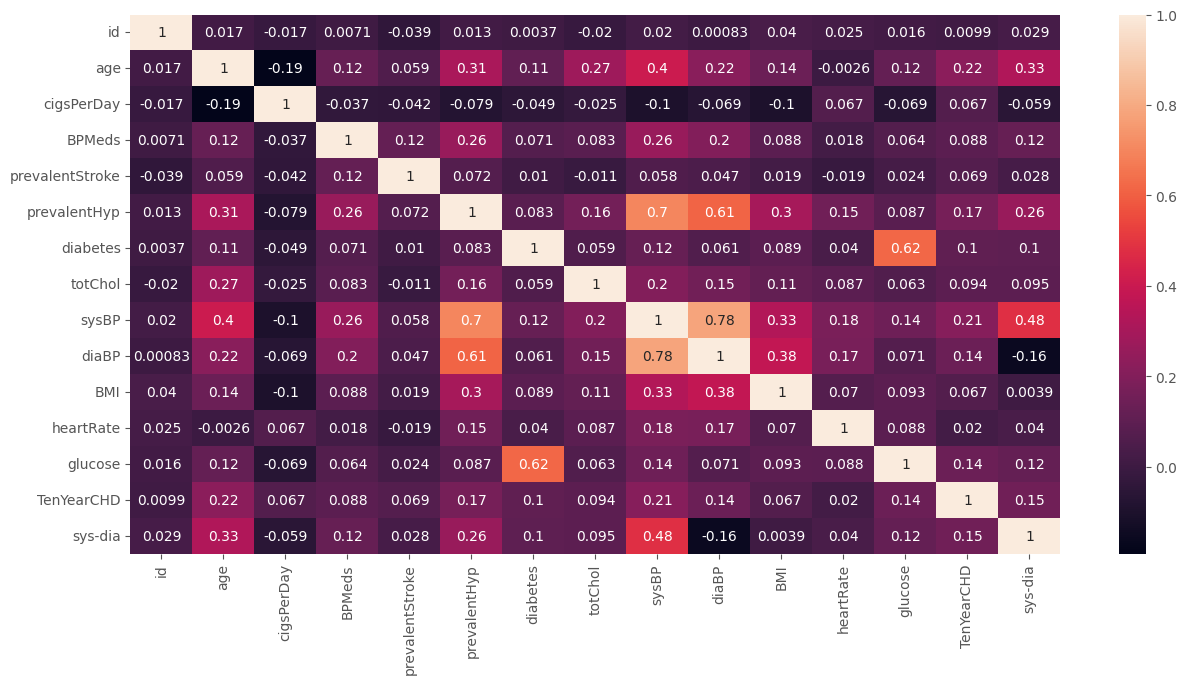

In [41]:
# Correlation Heatmap visualization code
fig,ax=plt.subplots(figsize=(15,7))
fig=sns.heatmap(df.corr(), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

This show correlation between each variable.

##### 2. What is/are the insight(s) found from the chart?

1. PrevalentHYP is heighly correlated to blood pressure (sys=0.7 and dia=0.61)
2. daibetes is heighly correlated to glucose (0.62)
3. age & cigsperday, diabp & sysbp is heighly negative correlated.
4. TenyearCHD is slightly heigh correlated to only blood pressure.

#### Chart - 15 -**` Pair Plot `**

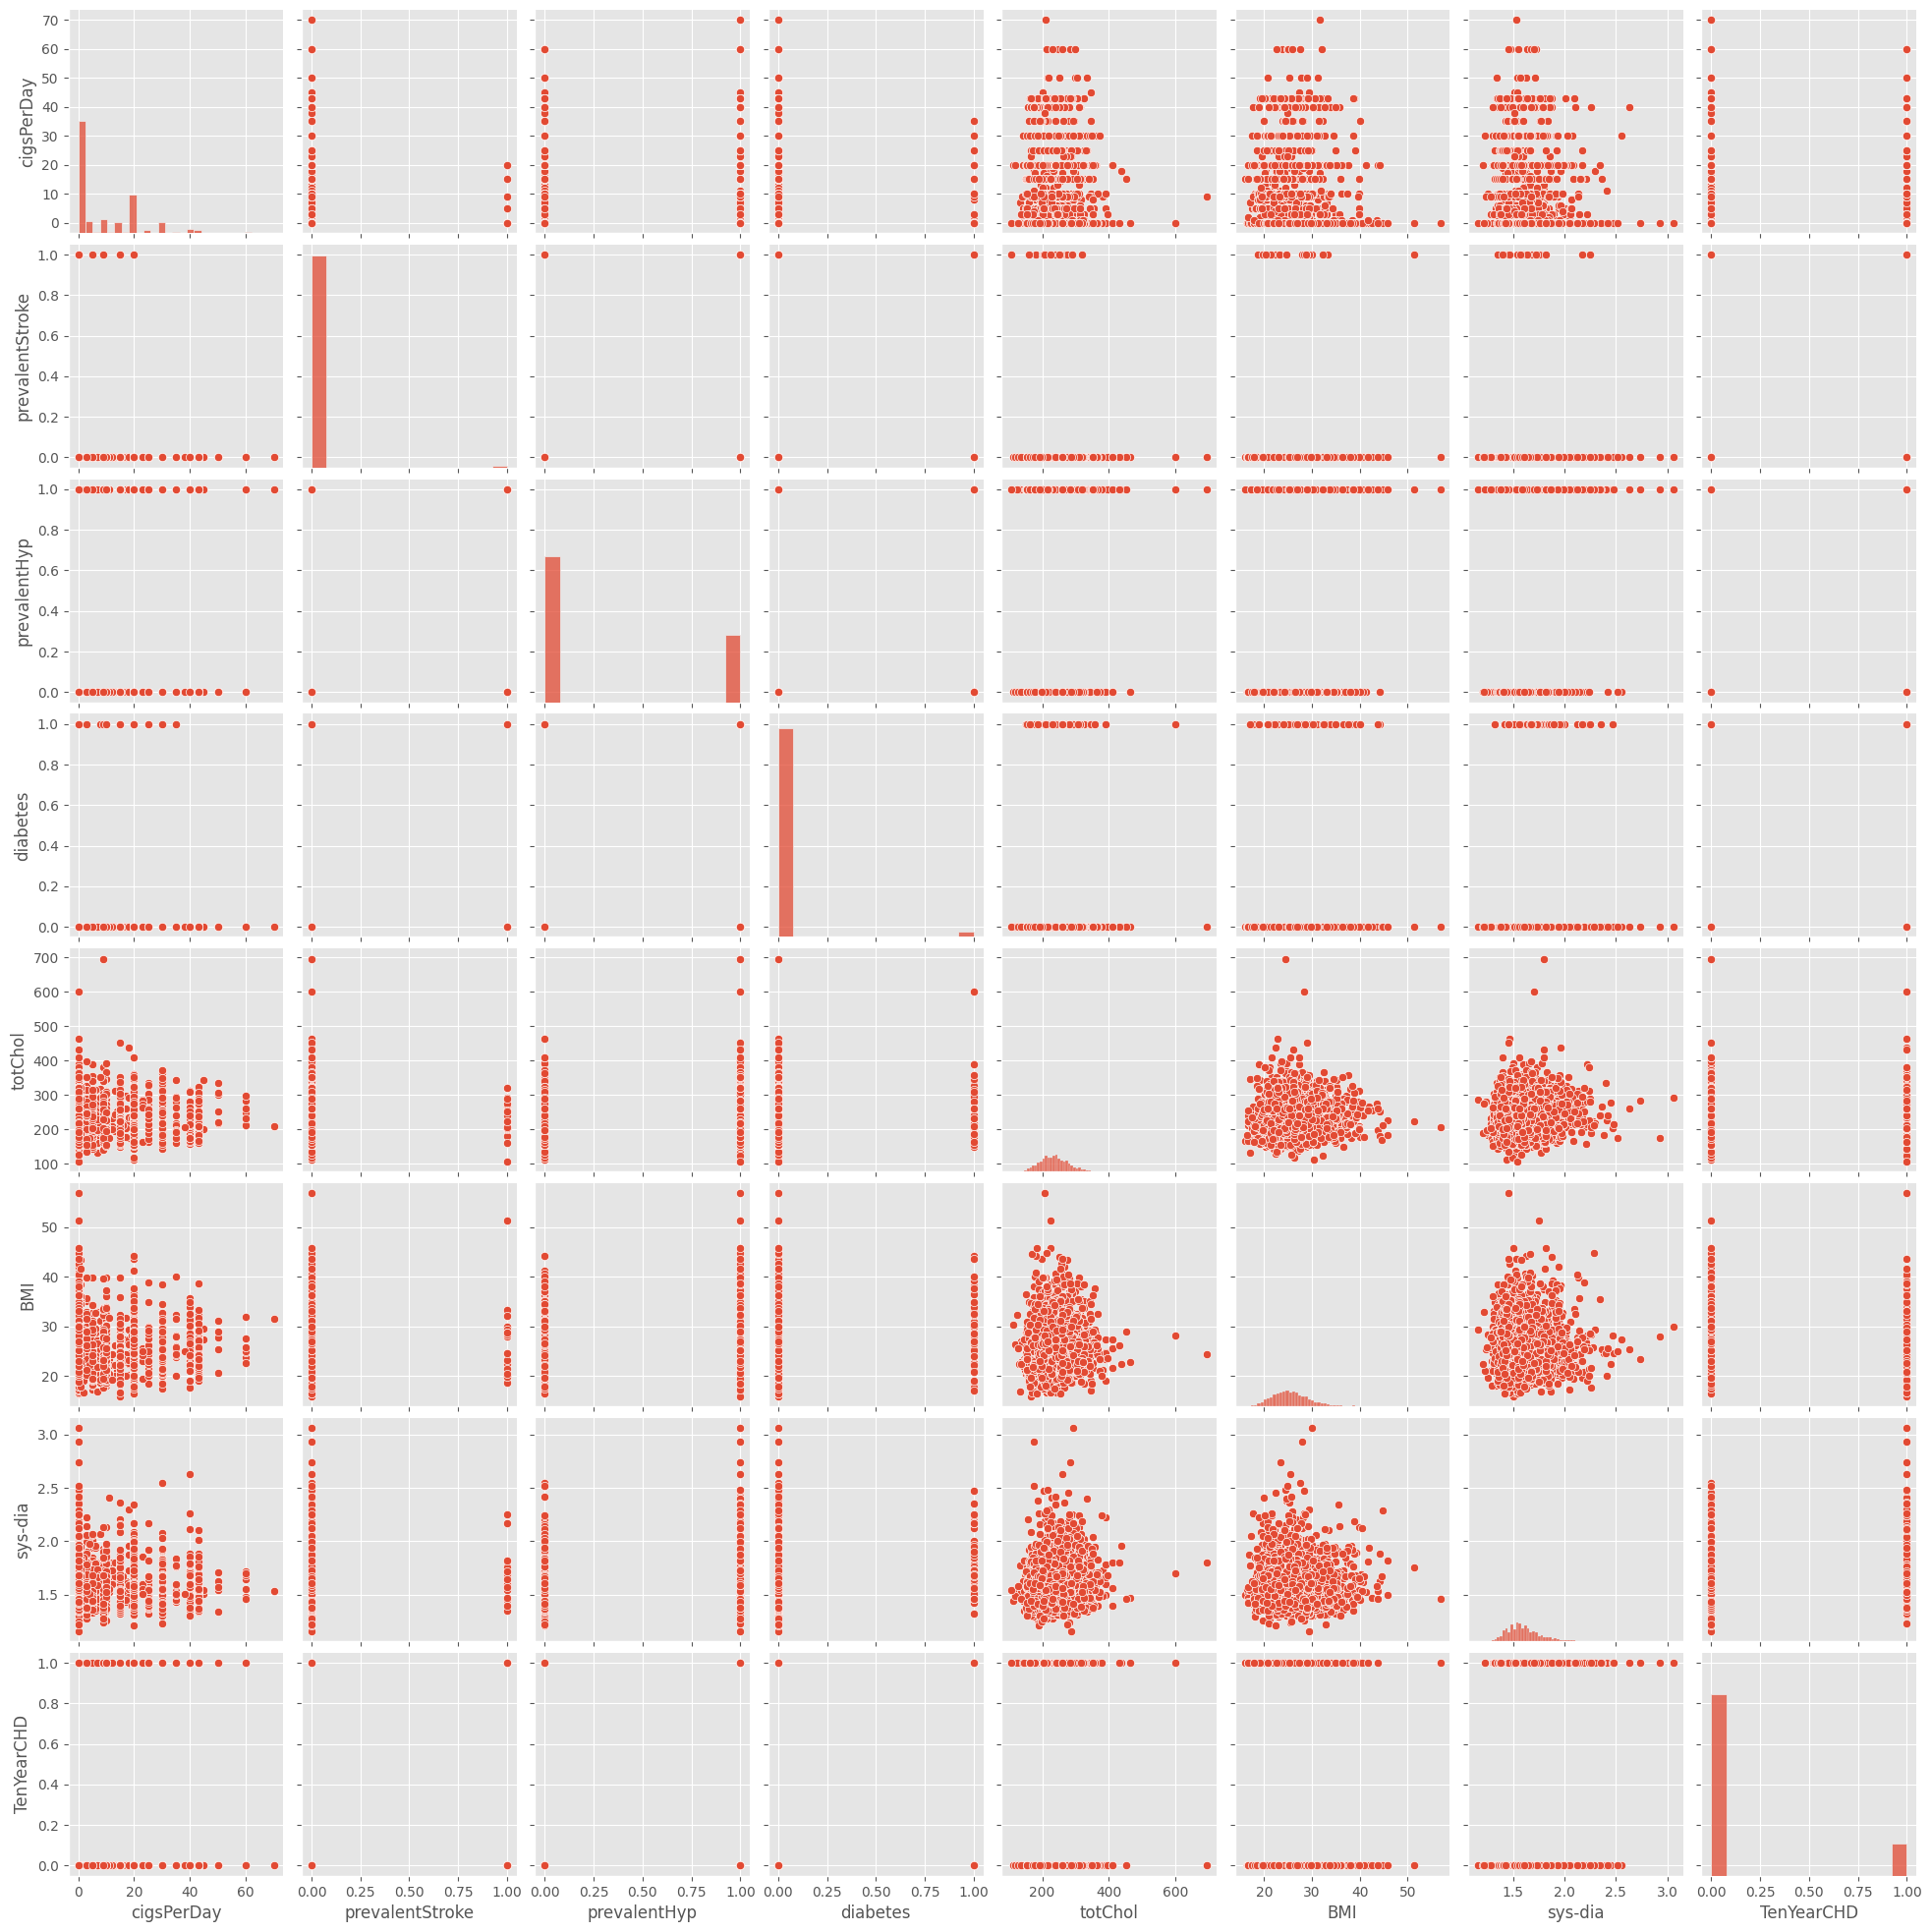

In [42]:
sns.pairplot(df[['cigsPerDay','prevalentStroke','prevalentHyp','diabetes','totChol','BMI','sys-dia','TenYearCHD']])

##### 1. Why did you pick the specific chart?

This chart show the pairplot of some important variable of dataset .

##### 2. What is/are the insight(s) found from the chart?

1. totchol is lie between 100 to 400 maximum for each variable.
2. BMI is also lies between 10 to 40 maximum time for each variable.
3. cigsperday also lies between 0 to 40 for each variable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. is this all variable is normaly distributed or not?
2. are any dependent variable present in dataset ?
3. Check whether discrete variables are related or not ?

Here going to create a sample dataset for all hypothetical test.

In [43]:
# creating a sample dataset
sample_dataset=dataset.sample(300)

### Hypothetical Statement - 1 : **`Normality test`**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null hypothesis= vraible is not normaly distributed.

alternate hypothesis = variable is normaly distributed.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
for i in sample_dataset.select_dtypes(include=np.number).columns.tolist():
  stats, p_value=shapiro(dataset[i])
  if p_value>0.5:
    print( i," is normaly distributed .","\n","P_value is : ",p_value,"\n","................")
  else:
    print(i,' is not normaly distributed.',"\n","P_value is : ",p_value,"\n","................")

id  is not normaly distributed. 
 P_value is :  3.668555650695946e-31 
 ................
age  is not normaly distributed. 
 P_value is :  1.4308746596003523e-27 
 ................
education  is normaly distributed . 
 P_value is :  1.0 
 ................
cigsPerDay  is normaly distributed . 
 P_value is :  1.0 
 ................
BPMeds  is normaly distributed . 
 P_value is :  1.0 
 ................
prevalentStroke  is not normaly distributed. 
 P_value is :  0.0 
 ................
prevalentHyp  is not normaly distributed. 
 P_value is :  0.0 
 ................
diabetes  is not normaly distributed. 
 P_value is :  0.0 
 ................
totChol  is normaly distributed . 
 P_value is :  1.0 
 ................
sysBP  is not normaly distributed. 
 P_value is :  1.834621562453247e-36 
 ................
diaBP  is not normaly distributed. 
 P_value is :  1.0126829307451722e-24 
 ................
BMI  is normaly distributed . 
 P_value is :  1.0 
 ................
heartRate  is normaly distri

here we can see the distribution of variable through hist plot.

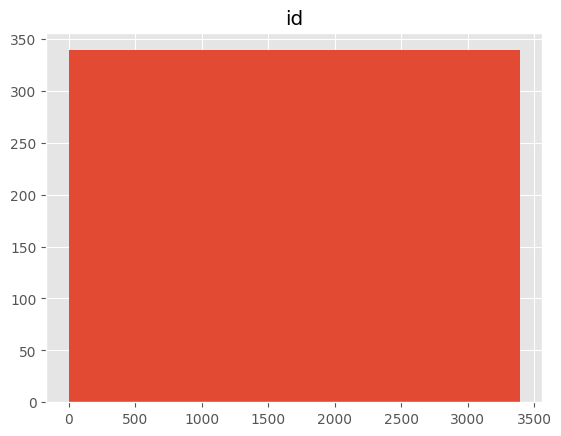

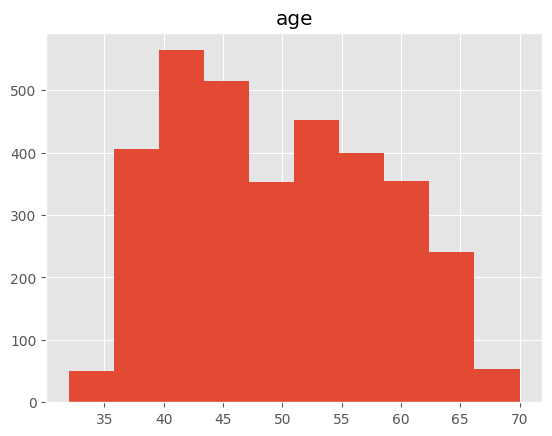

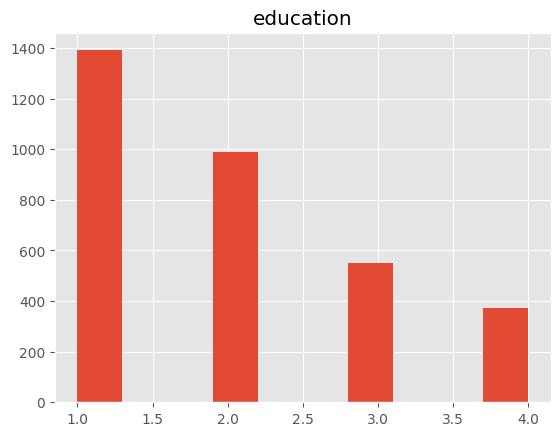

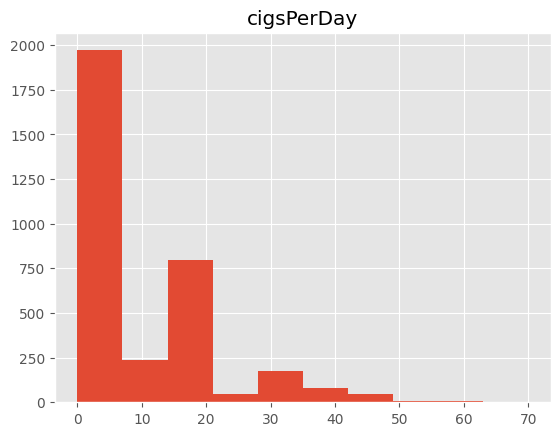

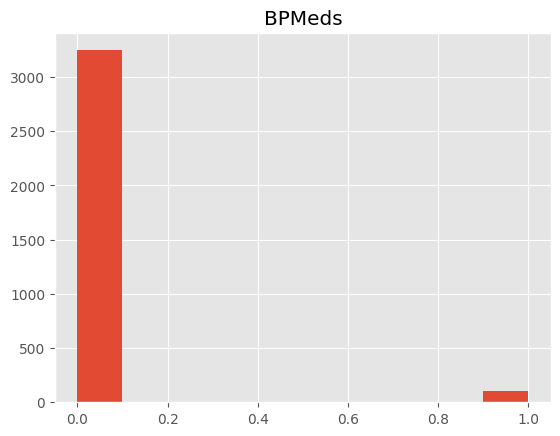

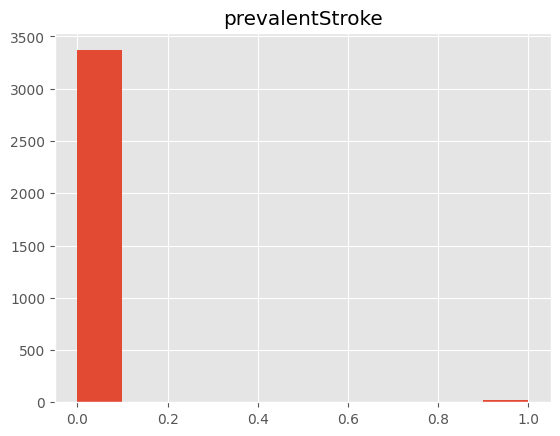

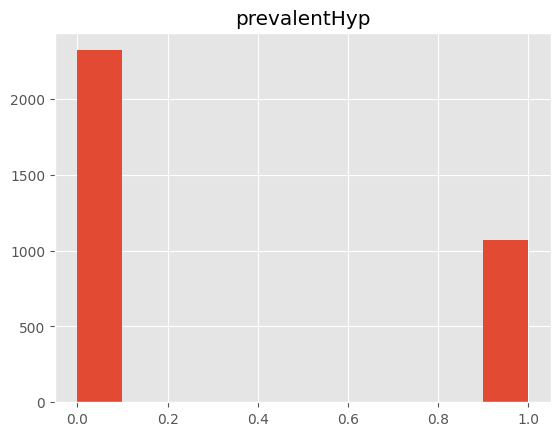

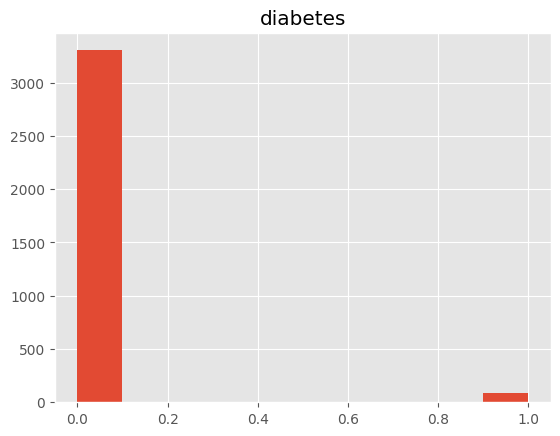

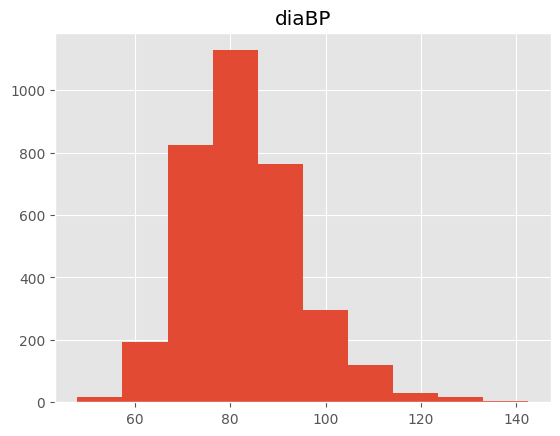

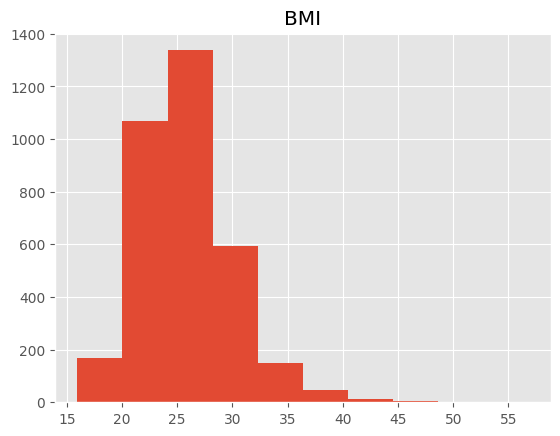

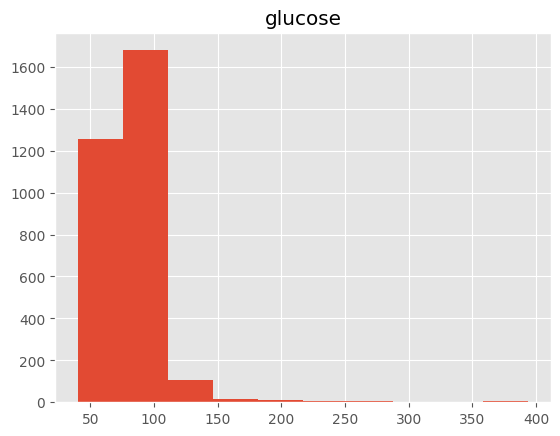

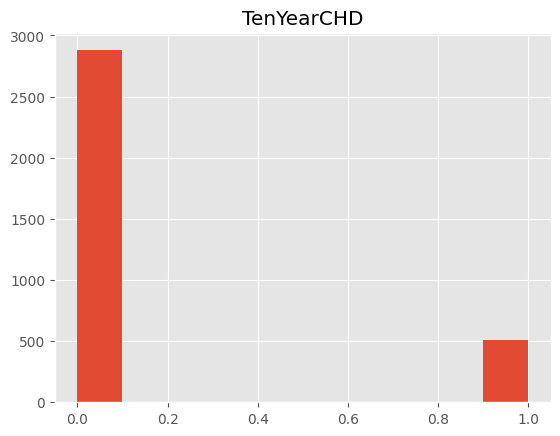

In [45]:
for i in sample_dataset.select_dtypes(include=np.number).columns.tolist():
  plt.hist(dataset[i])
  plt.title(f"{i}")
  plt.show()

##### Which statistical test have you done to obtain P-Value?

**shapiro Test**

##### Why did you choose the specific statistical test?

To check whether the considered data is normally distributed data or not.

### Hypothetical Statement - 2 : **`The strength and direction of association between two ranked variables. (variable dependency test)`**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : variable is not dependent to each other .

Alternate hypothesis : variable is dependent to each other.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
s_data=sample_dataset[['sysBP','diaBP','totChol','BMI','glucose']]
for i in s_data.select_dtypes(include = np.number).columns.tolist():
  for j in s_data.select_dtypes(include = np.number).columns.tolist():
    stat,p_value=spearmanr(dataset[i][0:50],dataset[j][0:50],nan_policy='omit')
    if p_value>0.05:
      pass
    else:
      if i!=j:
        print(i,':',j)
        print("p_value : ",p_value)
        print("dependent variable","\n")

sysBP : diaBP
p_value :  1.0774980400420165e-14
dependent variable 

sysBP : BMI
p_value :  0.00022421865023073572
dependent variable 

diaBP : sysBP
p_value :  1.0774980400420165e-14
dependent variable 

diaBP : BMI
p_value :  2.5156326759317237e-06
dependent variable 

BMI : sysBP
p_value :  0.00022421865023073572
dependent variable 

BMI : diaBP
p_value :  2.5156326759317237e-06
dependent variable 



##### Which statistical test have you done to obtain P-Value?

**Spearmanr**

##### Why did you choose the specific statistical test?

It basically gives the measure of monotonicity of the relation between two variables i.e. how well the relationship between two variables could be represented using a monotonic function.


Dependent variable : means that variable which are highly correlated to each other.

### Hypothetical Statement - 3 : **` Check whether discrete variables are related  .`**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To check whether discrete variables are related, chi2 test can be used. We define:
1. Null Hypothesis (H0): Two variables are independent.
2. Alternate Hypothesis (H1): Two variables are not independent.

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [47]:
s_data=sample_dataset[['prevalentHyp','diabetes','BPMeds','prevalentStroke','sex','education','is_smoking','TenYearCHD']]

In [48]:
s_data.is_smoking=[1 if i == 'YES' else 0 for i in s_data.is_smoking]
s_data.sex=[1 if j == 'M' else 0 for j in s_data.sex]

<ipython-input-48-bfbef80ca794>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-bfbef80ca794>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
s_data.dropna(inplace=True)

<ipython-input-49-9e8065bb359d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
# chi2 scores
chi_scores = chi2(s_data.drop(columns='TenYearCHD'),s_data['TenYearCHD'])
chi_scores


(array([2.92582839, 0.89411765, 0.68267401, 0.5129257 , 1.52605779,
        0.05903153, 0.01761266]),
 array([0.08717247, 0.3443639 , 0.40866746, 0.47387508, 0.21670507,
        0.80803324, 0.8944206 ]))

In [51]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = s_data.drop(columns='TenYearCHD').columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking         0.894421
education          0.808033
prevalentStroke    0.473875
BPMeds             0.408667
diabetes           0.344364
sex                0.216705
prevalentHyp       0.087172
dtype: float64

In [52]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

<Axes: title={'center': 'P-value for discrete features'}>

* Since prevalent hypertension column (prevalent_hyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines  the outcome of the dependent variable.
* The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).
* We can drop this column since we already have a column cigs_per_day, which gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.

##### Which statistical test have you done to obtain P-Value?

**Chi2 test**

##### Why did you choose the specific statistical test?

Check whether discrete variables are related or not .

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

this is the heatmap of null value in dataset.

<Axes: >

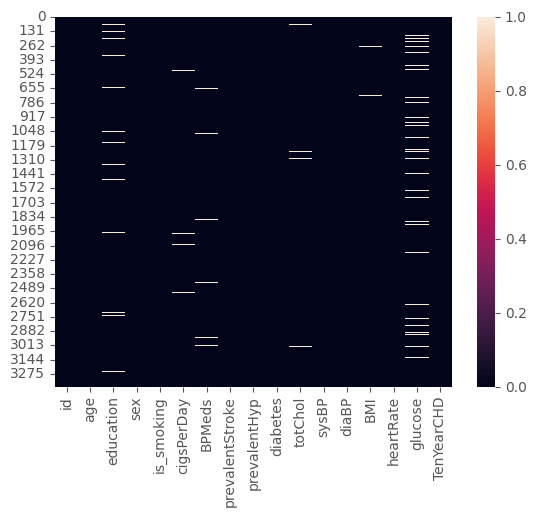

In [53]:
# Handling Missing Values & Missing Value Imputation
sns.heatmap(dataset.isnull())

**`cigs_per_day`**

In [54]:
# Imputing the missing values in the cigs_per_day
dataset['cigsPerDay'] = dataset['cigsPerDay'].fillna(dataset[df['is_smoking']=='YES']['cigsPerDay'].median())

**`BPMeds`**

In [55]:
#filling the null value of BPMeds.
#if sysBP>80 and diaBP >120 then petaints taking the BPMeds otherwise not taking BPMeds.
dataset.BPMeds=np.where((dataset.diaBP>80)&(dataset.sysBP>120),dataset.BPMeds.fillna(1),dataset.BPMeds)
dataset.BPMeds.fillna(0,inplace=True)

**`totChol`**

In [56]:
#filling the null value with median of totChol.
t_median=dataset.totChol.median()
dataset.totChol.fillna(t_median,inplace=True)


**`BMI`**

In [57]:
#filling the null value with median of BMI.
m_BMI=dataset.BMI.median()
dataset.BMI.fillna(m_BMI, inplace=True)

**`heartRate`**

In [58]:
#droping the null value of heartRate because there is only one null value present.
dataset=dataset.dropna(subset='heartRate',axis=0)

**`education`**

In [59]:
#filling the null value of education with mode .
e_mode=dataset.education.mode()
dataset.education.fillna(e_mode[0],inplace=True)

<ipython-input-59-e0d7efaa6429>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**`glucose`**

In [60]:
#here imputing the null vlaue of glucose by KNN imputer.
print(f"this is the mean before imputing the null vlaue : {dataset.glucose.mean()}")
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(dataset[['glucose']])
dataset['glucose'] = pd.DataFrame(imputed, columns=dataset[['glucose']].columns)
print(f"this is the mean after imputing the null vlaue : {dataset.glucose.mean()}")

this is the mean before imputing the null vlaue : 82.0836304700162
this is the mean after imputing the null vlaue : 82.06771654748671


Here we can see the all null vlaue of dataset is fill now .

In [61]:
dataset.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            1
TenYearCHD         0
dtype: int64

here we can see that one null vlaue is left becouse it is a disadvantage of KNN imputer . so we are going to drop by using drop fuction .

In [62]:
dataset.dropna(axis=0,inplace=True)

In [63]:
sns.heatmap(dataset.isnull())

<Axes: >

#### What all missing value imputation techniques have you used and why did you use those techniques?

*Missing value imputation*


*   Cigs_per_day - filled the missing value with median of number of smoking value.
*   BPMeds - if sysBP>80 and diaBP >120 then petaints taking the BPMeds otherwise not taking BPMeds.
*   totalChol - with median of totChol.
*   BMI - with median of BMI.
*   heartRate - droping the null value of heartRate because there is only one null value present.
*   education - with mode of education.
*   glucose - here imputing the null vlaue of glucose by KNN imputer.




### 2. Handling Outliers

In [64]:
dataset_num=dataset[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

Here we can see the boxplot of each numerical columns of this dataset.

In [65]:
for i in dataset_num.columns.tolist():
  fig=go.Figure()
  fig.add_trace(go.Box(x=dataset_num[i],name=i,fillcolor='green'))
  fig.update_layout(
    title_text=i,
    title_x=0.5,
    title_y=0.85,
    title_font=dict(
        color="blue",
        size=20,
        family="Arial-bold"
      )
    )
  fig.show()


Here we are going to impout the outliers through MODE in categorical columns and MEDIAN in continues columns.

In [66]:
#here we can see the number of outlier in each columns
for i in dataset_num.columns.tolist():
  Q1,Q3=np.percentile(dataset_num[i],[25,75])
  IQR = Q3-Q1
  lower_fence=Q1-(1.5*IQR)
  higher_fence=Q3+(1.5*IQR)
  print(f"{i}->",f"Less than lower fence : {len(dataset_num[dataset_num[i]<lower_fence][i])} |",
        f"Greater than higher fence : {len(dataset_num[dataset_num[i]>higher_fence][i])} | ",
        f"Total number of outliers : {len(dataset_num[(dataset_num[i]<lower_fence) | (dataset_num[i]>higher_fence)][i])}")

age-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
education-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
cigsPerDay-> Less than lower fence : 0 | Greater than higher fence : 9 |  Total number of outliers : 9
totChol-> Less than lower fence : 2 | Greater than higher fence : 41 |  Total number of outliers : 43
sysBP-> Less than lower fence : 0 | Greater than higher fence : 105 |  Total number of outliers : 105
diaBP-> Less than lower fence : 3 | Greater than higher fence : 55 |  Total number of outliers : 58
BMI-> Less than lower fence : 0 | Greater than higher fence : 79 |  Total number of outliers : 79
heartRate-> Less than lower fence : 1 | Greater than higher fence : 63 |  Total number of outliers : 64
glucose-> Less than lower fence : 14 | Greater than higher fence : 199 |  Total number of outliers : 213


In [67]:
#filling the dataset with floor value and capp value .
for j in dataset_num.columns.tolist():
  Q1 = dataset[j].quantile(0.25)
  Q3 = dataset[j].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 +(whisker_width*IQR)
  dataset[j]=np.where(dataset[j]>upper_whisker,upper_whisker,np.where(dataset[j]<lower_whisker,lower_whisker,dataset[j]))
  dataset_num[j]=np.where(dataset_num[j]>upper_whisker,upper_whisker,np.where(dataset_num[j]<lower_whisker,lower_whisker,dataset_num[j]))

<ipython-input-67-8214a6022d0b>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-8214a6022d0b>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-8214a6022d0b>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-8214

In [68]:
#here we can see the number of outlier in each columns
for i in dataset_num.columns.tolist():
  Q1,Q3=np.percentile(dataset[i],[25,75])
  IQR = Q3-Q1
  lower_fence=Q1-(1.5*IQR)
  higher_fence=Q3+(1.5*IQR)
  print(f"{i}->",f"Less than lower fence : {len(dataset_num[dataset_num[i]<lower_fence][i])} |",
        f"Greater than higher fence : {len(dataset_num[dataset_num[i]>higher_fence][i])} | ",
        f"Total number of outliers : {len(dataset_num[(dataset_num[i]<lower_fence) | (dataset_num[i]>higher_fence)][i])}")

age-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
education-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
cigsPerDay-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
totChol-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
sysBP-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
diaBP-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
BMI-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
heartRate-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0
glucose-> Less than lower fence : 0 | Greater than higher fence : 0 |  Total number of outliers : 0


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Flooring And Capping**
in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

### 3. Categorical Encoding

Here we can only 2 feature are categorical feature .
1. sex
2. is_smoking

In [69]:
dataset.head(5)

id   age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0  64.0        2.0   F        YES         3.0     0.0                0   
1   1  36.0        4.0   M         NO         0.0     0.0                0   
2   2  46.0        1.0   F        YES        10.0     0.0                0   
3   3  50.0        1.0   M        YES        20.0     0.0                0   
4   4  64.0        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

we are giong to replace ..
1. sex : 'M' with 1 and 'F' with 0
2. is_smoking : 'YES' with 1 and 'NO' with 0

In [70]:
# Encode your categorical columns
dataset.sex=[1 if i == 'M' else 0 for i in dataset.sex]
dataset.is_smoking=[1 if i == 'YES' else 0 for i in dataset.is_smoking]

In [71]:
dataset.head(5)

id   age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0  64.0        2.0    0           1         3.0     0.0                0   
1   1  36.0        4.0    1           0         0.0     0.0                0   
2   2  46.0        1.0    0           1        10.0     0.0                0   
3   3  50.0        1.0    1           1        20.0     0.0                0   
4   4  64.0        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here we could have used Hotencoding as well but we use this

we are giong to replace ..
1. sex : 'M' with 1 and 'F' with 0
2. is_smoking : 'YES' with 1 and 'NO' with 0

becouse it perform better than hotencoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [72]:
# Manipulate Features to minimize feature correlation and create new features
dataset.index = dataset['id']
dataset.drop('id',axis=1,inplace=True)

In [73]:
X=dataset.drop('TenYearCHD',axis=1)
Y=dataset['TenYearCHD']

In [74]:
print("feature variable shape : ",X.shape)
print("target variable shape : ",Y.shape)

feature variable shape :  (3388, 15)
target variable shape :  (3388,)


Here i colud also do some manipulation by deviding and multipling the tow columns , i tried but it not gave to good correlation value with label variable therefor i can use in main dataset.

#### 2. Feature Selection

In [75]:
# Select your features wisely to avoid overfitting

1. **`Random Forest Importance`**

In [76]:
#Random Forest Importance

In [77]:
im_model=RandomForestClassifier(n_estimators=500)
im_model.fit(X,Y)

RandomForestClassifier(n_estimators=500)

In [78]:
imp=im_model.feature_importances_
importance=pd.DataFrame()
importance['value']=imp
importance['columns']=X.columns
fig=go.Figure()
fig.add_trace(go.Bar(x=importance['columns'],y=importance['value']))
fig.update_layout(
    title_text='RANDOM FOREST IMPORTANCE',
    title_x=0.5,
    title_y=0.85
)
fig.show()

Here we can see clearly the importance of each feature in the model training.

2. **`Wrapper Methods`**

Here total number of 15 columns we are going to drop one of them which is less affective for model trainig and 14 are remaing left in dataset which are important for the model trainig and also important for dataset.

In [79]:
clf=RandomForestClassifier(n_estimators=200)
sfs=SFS(clf,n_features_to_select=14,n_jobs=-1)
sfs.fit(X,Y)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=200),
                          n_features_to_select=14, n_jobs=-1)

In [80]:
{x: y for x, y in zip(X.columns.tolist(), sfs.get_support().tolist())}

{'age': True,
 'education': True,
 'sex': True,
 'is_smoking': True,
 'cigsPerDay': True,
 'BPMeds': True,
 'prevalentStroke': True,
 'prevalentHyp': True,
 'diabetes': True,
 'totChol': False,
 'sysBP': True,
 'diaBP': True,
 'BMI': True,
 'heartRate': True,
 'glucose': True}

Here the WRAPER method tell us drop those columns which have false value in front of the column name .

**note:** we cant use this method in feature selection because this tell us to drop that column wich is important in CHD analysis. whereas droping that column is slightly increasing the score of the model still we cant drop it .

3. **`Information Gain`**

In [81]:
important=mutual_info_classif(X,Y)
important_d=pd.DataFrame()
important_d['value']=important
important_d['columns']=X.columns

In [82]:
fig=go.Figure()
fig.add_trace(go.Bar(x=important_d['columns'],y=important_d['value']))
fig.update_layout(
    title_text='INFORMATION GAIN',
    title_x=0.5,
    title_y=0.85
)
fig.show()

NOW HERE WE ARE GOING TO COMPAIR AND DECIDE TO WHICH COLUMN IS BEST FOR DROPING FROM DATASET .

In [83]:
fig=go.Figure()
fig.add_trace(go.Bar(x=p_values.index,y=p_values.values))
fig.show()

In [84]:
from plotly.tools import make_subplots
fig=make_subplots(rows=1, cols=3)
fig.add_trace(go.Bar(x=importance['columns'],y=importance['value'],name='Random forest importance'),row=1, col=1)
fig.add_trace(go.Bar(x=important_d['columns'],y=important_d['value'],name='Information gain'),row=1, col=2)
fig.add_trace(go.Bar(x=p_values.index,y=p_values.values,name='Chi2 test'),row=1, col=3)
fig.update_layout(
    title_text='COMPERISION BTWEEN {RANDOM FOREST IMPORTANCE, INFORMATION GAIN, Chi2 }',
    title_x=0.44,
    title_y=0.85
)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



* Here we are going to drop the `'is_smoking'` column because it give low information gain, also showing low importance in model training.
* and in chi2 test we can clearly see that the 'is_smoking' have highest number of p_value.

In [85]:
X.drop('is_smoking',axis=1,inplace=True)

In [86]:
X.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

##### What all feature selection methods have you used  and why?

1. **`Random Forest Importance`** : Random Forests is a kind of Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.
2. **`Wrapper Methods`** : Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.
3. **`Information Gain`** : Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

##### Which all features you found important and why?

'age', 'education', 'sex', 'is_smoking', 'cigsPerDay',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'

These are the important feature because this show high information gain and hiegh importance in model training .



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [87]:
continuous_var=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

**cheacking skewness in continiuous veriable**

In [88]:
# skewness along the index axis
(X[continuous_var]).skew(axis = 0)

age           0.226541
cigsPerDay    1.127530
totChol       0.340885
sysBP         0.718118
diaBP         0.419491
BMI           0.450437
heartRate     0.418234
glucose       0.340495
dtype: float64

here we can clearly see that the features are normaly distributed .

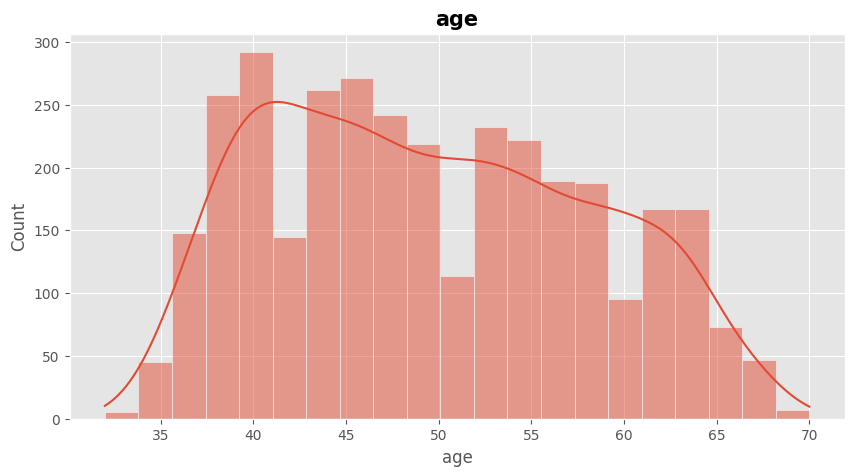

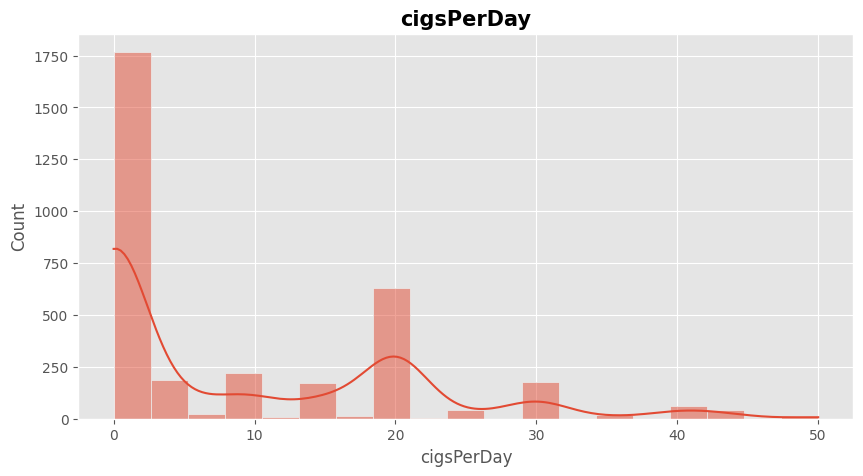

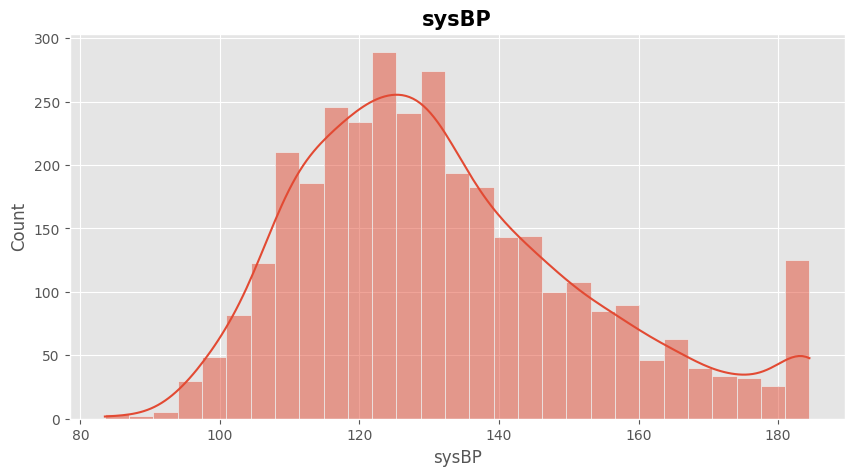

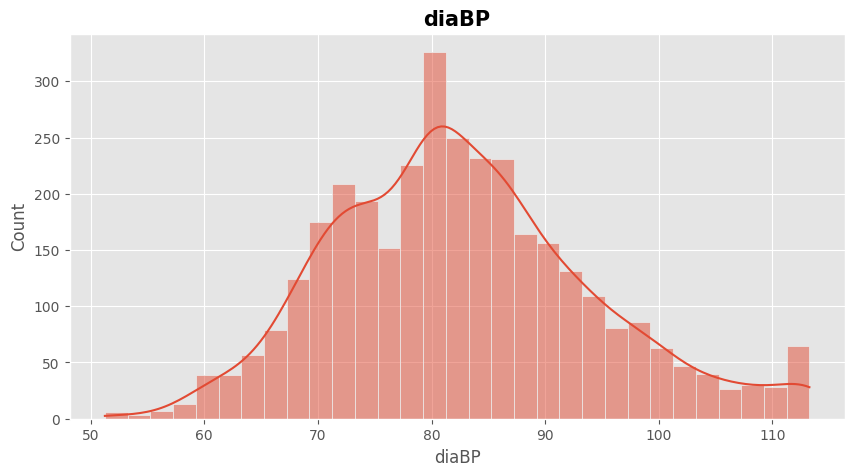

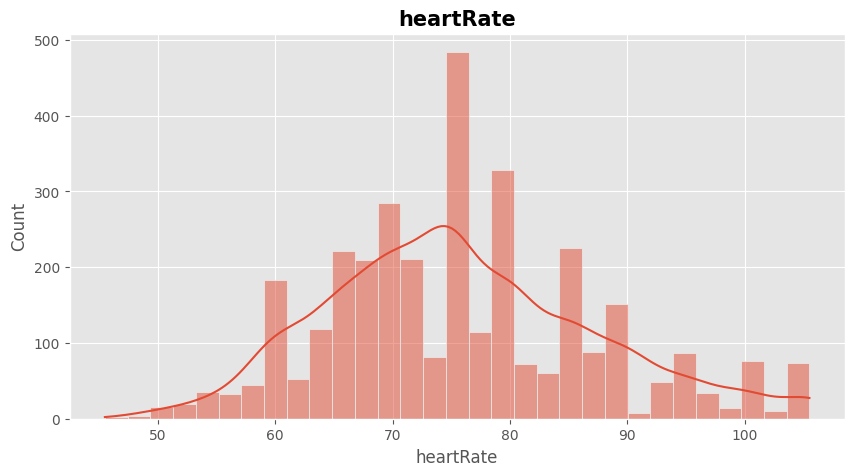

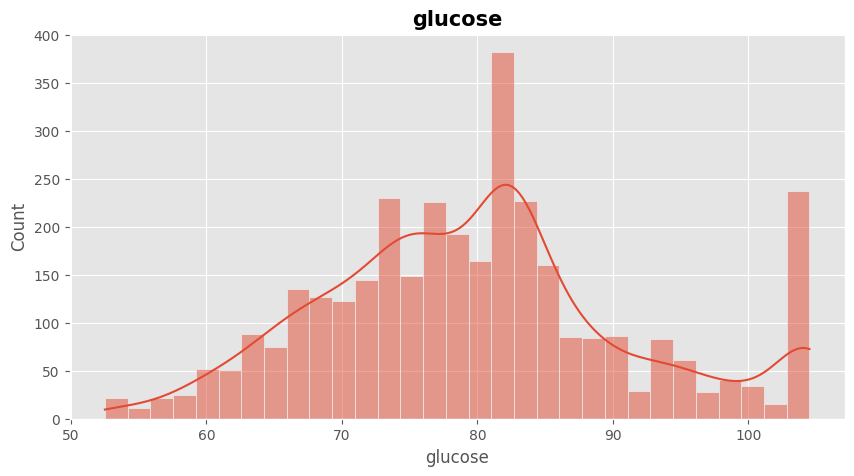

In [89]:
#ploting the skewness of variable
for i in continuous_var:
   plt.figure(figsize=(10,5))
   sns.histplot(dataset[i],kde=True)
   plt.title(i,fontsize=15,fontweight='bold')
   plt.show()

maximum features are right skwed.

**Many continuous variables are skewed. By log transformation, we aim to reduce the magnitude of skew in these variables to a certain extent.**

 **Skew for log10 transformation**

In [90]:
# log10 transformation
X[continuous_var]=np.log10(X[continuous_var]+1)

In [91]:
# Checking skew after log transformation
X[continuous_var].skew(axis = 0)

age          -0.014351
cigsPerDay    0.273343
totChol      -0.157027
sysBP         0.369118
diaBP         0.027703
BMI           0.073250
heartRate     0.028215
glucose      -0.043025
dtype: float64

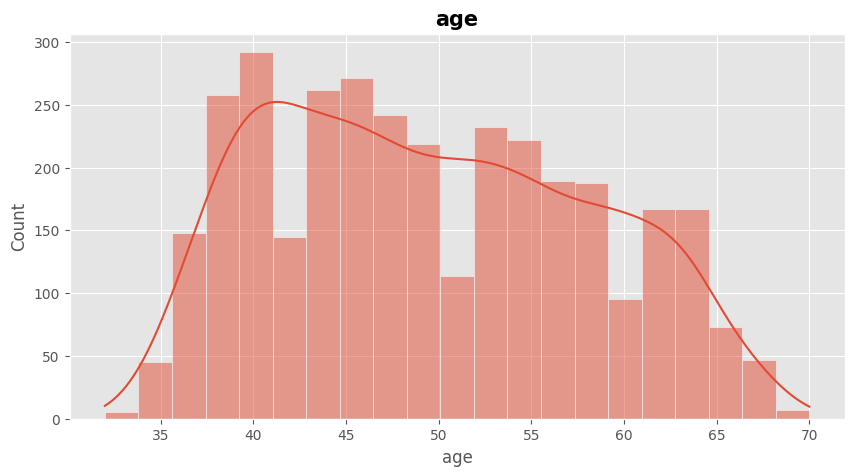

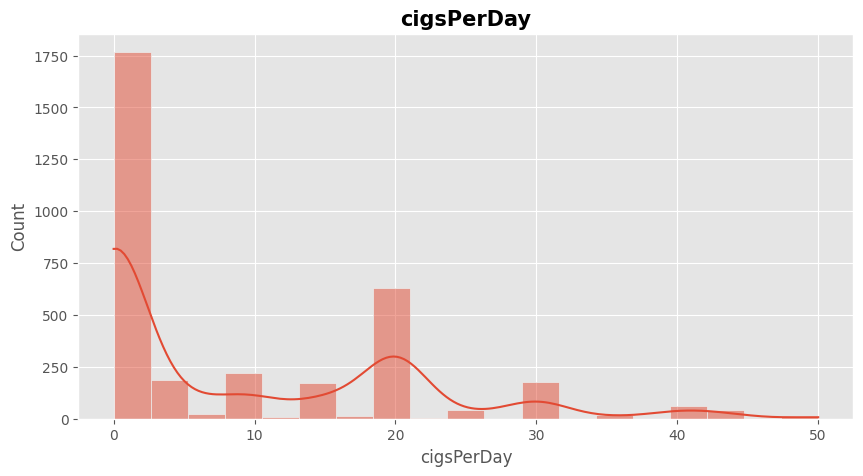

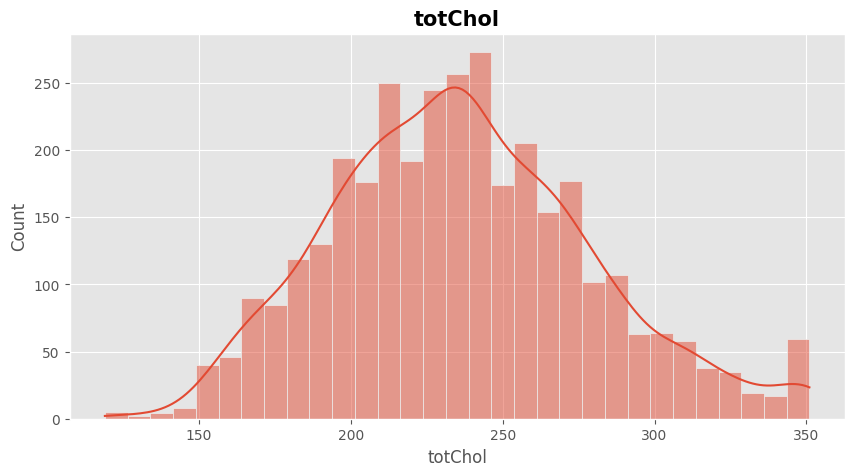

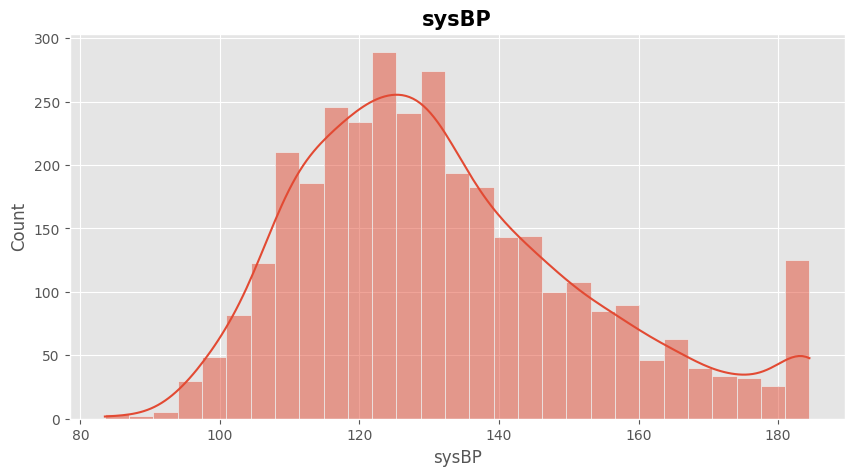

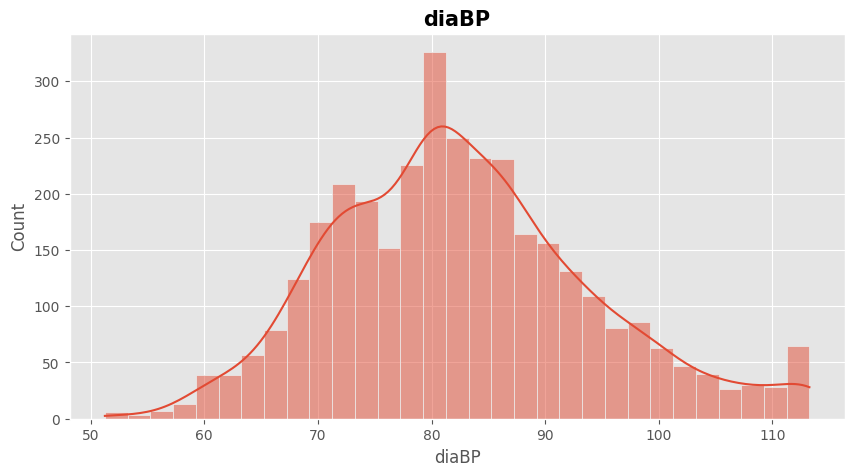

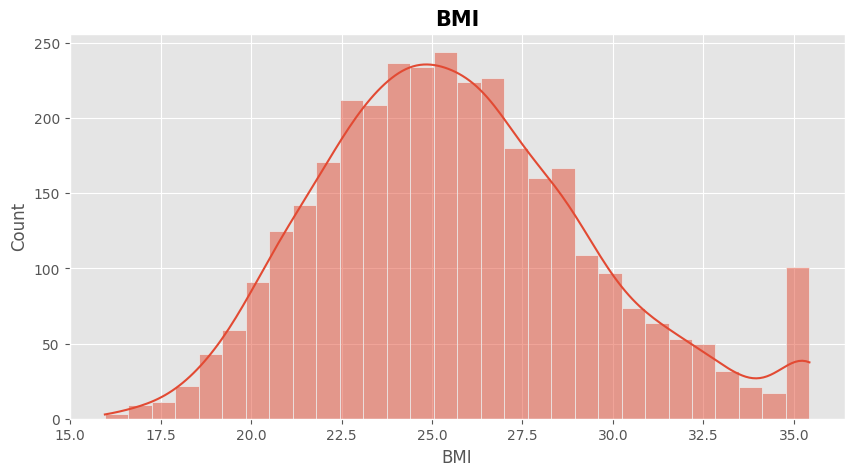

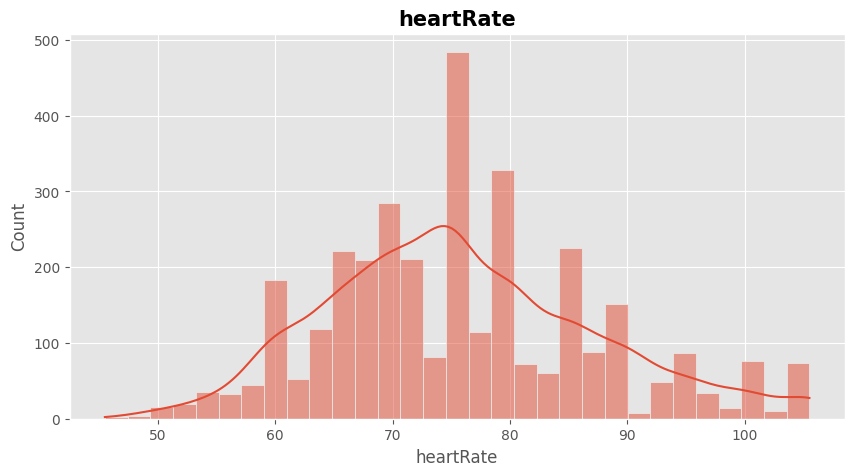

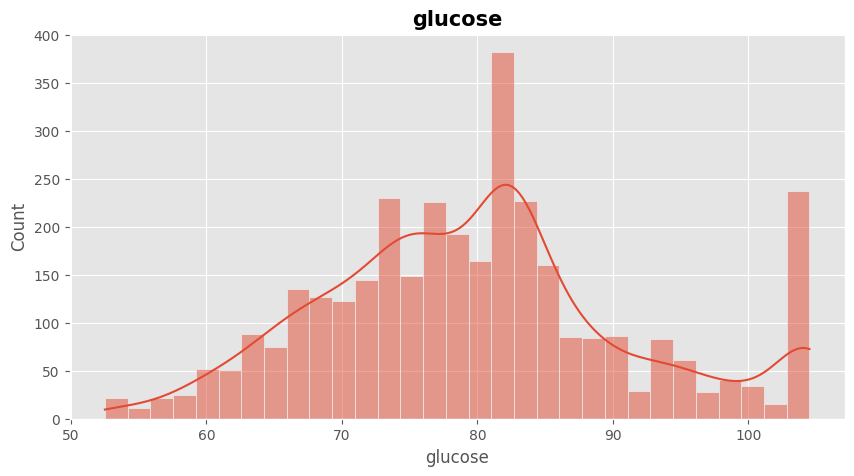

In [92]:
for i in continuous_var:
   plt.figure(figsize=(10,5))
   sns.histplot(dataset[i],kde=True)
   plt.title(i,fontsize=15,fontweight='bold')
   plt.show()

***we have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.***

### 6. Data Scaling

In [93]:
# Scaling your data
scale= StandardScaler()
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)

##### Which method have you used to scale you data and why?

MinMaxScaler : its default scale for the MinMaxScaler is to rescale variables into the range [0,1]. and we are going to use default scaling .

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

NO, because there is not large number of feature avilabe and we can try for '**`diaBP`**' and '**`sysBP`**' but when i combine them i got very low correlation for that feature therefor i am not going to do any Dimensionality reduction in this dataset.

In [94]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.
train_x,test_x,train_y,test_y=train_test_split(x,Y,test_size=0.3, random_state=0, stratify=Y, shuffle=True)

##### What data splitting ratio have you used and why?

train|test=8|3 , because i want to give more data to model for training.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

yes : because here we can see in target variable the len of '0' is 2193 and '1' is 403 only .

In [96]:
train_y.value_counts()

0    2014
1     357
Name: TenYearCHD, dtype: int64

In [97]:
fig=go.Figure()
fig.add_trace(go.Bar(x=[0,1],y=[len(train_y[train_y==0]),len(train_y[train_y==1])]))
fig.show()

In [98]:
# Handling Imbalanced Dataset (If needed)
smote=SMOTETomek(random_state=42)
x_train,y_train=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)

In [99]:
fig=go.Figure()
fig.add_trace(go.Bar(x=[0,1],y=[len(y_train[y_train==0]),len(y_train[y_train==1])]))
fig.show()

how here dataset is balanced .

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

1. **SMOTETomek** is somewhere upsampling and downsampling. SMOTETomek is a hybrid method which is a mixture of the above two methods, it uses an under-sampling method (Tomek) with an oversampling method (SMOTE).
2. Here i create new data compearing the target variable and labeled varables .

## ***7. ML Model Implementation***

### ML Model - 1 : **`KNeighborsClassifier`**

In [100]:
# ML Model - 1 Implementation
model1=KNeighborsClassifier()
# Fit the Algorithm
model1.fit(x_train,y_train)
# Predict on the model
model1_predict=model1.predict(test_x)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Visualizing evaluation Metric Score chart
print(f"---------------------------------This is the score of model1 : {accuracy_score(test_y,model1_predict)} ---------------------------------")

---------------------------------This is the score of model1 : 0.6138211382113821 ---------------------------------


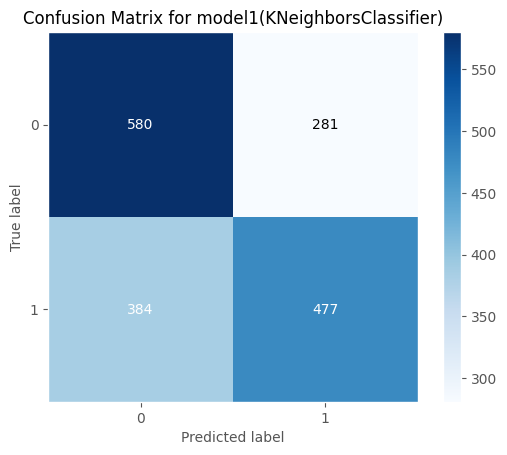

In [102]:
#confussion matrix.
skplt.metrics.plot_confusion_matrix(test_y, model1_predict, normalize=False, title = 'Confusion Matrix for model1(KNeighborsClassifier)')
plt.show()

In [103]:
print(f"This is the precision score of that metrics  : {precision_score(test_y,model1_predict)}")
print(f"This is the Recall score of that metrics  : {recall_score(test_y,model1_predict)}")

This is the precision score of that metrics  : 0.6292875989445911
This is the Recall score of that metrics  : 0.554006968641115


In [104]:
train_size,train_score,test_score=learning_curve(model1,x_train,y_train,scoring='accuracy',train_sizes=np.linspace(0.01,1,50),n_jobs=-1)
train_mean=train_score.mean(axis=1)
train_std=train_score.std(axis=1)
test_mean=test_score.mean(axis=1)
test_std=test_score.std(axis=1)

fig=go.Figure()
fig.add_trace(go.Scatter(x=train_size,y=train_mean,name='Training score'))
fig.add_trace(go.Scatter(x=train_size,y=test_mean,name ='Testing score (cv)'))
fig.add_trace(go.Scatter(x = train_size,y = train_mean + train_std,line_color = 'gray',showlegend=False,name = 'Upper band',opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = train_mean - train_std , line_color = 'gray', fill = 'tonexty', name = 'Lower band', showlegend=False, opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = test_mean + test_std,  line_color = 'gray',  name = 'upper band',  showlegend=False,  opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = test_mean-test_std, line_color = 'gray', fill = 'tonexty', name = 'Lower band', showlegend=False, opacity = 0.5),)
fig.update_layout(title_text='LEARNING CURVE WITH VARIOUS TRAINING SHAPE',title_x=0.5,title_y=0.85)
fig.update_yaxes(title_text='MODEL SCORE')
fig.update_xaxes(title_text='SHAPE OF TRAINING DATASET')
fig.show()


Here we can see after 1000 data the score of model is varing constatly , this show that increament of data will not going to improve the score of model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(model1, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# Fit the Algorithm
grid_search=grid.fit(x_train, y_train)
# Predict on the model
print(f"Best parameter for this model -  {grid_search.best_params_}")
print(f"Best score for this model -  {grid_search.best_score_ *100}")

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best parameter for this model -  {'n_neighbors': 2}
Best score for this model -  89.8606608478803


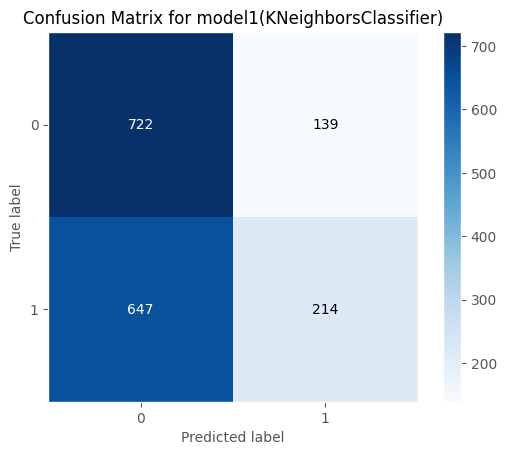

In [106]:
#confusion matrix of grid model.
model_1=KNeighborsClassifier(n_neighbors=2)
model_1.fit(x_train,y_train)
model_1_predict=model_1.predict(test_x)
skplt.metrics.plot_confusion_matrix(test_y, model_1_predict, normalize=False, title = 'Confusion Matrix for model1(KNeighborsClassifier)')
plt.show()

In [107]:
#this is the classification report for model 2
print(classification_report(test_y,model_1_predict))

              precision    recall  f1-score   support

           0       0.53      0.84      0.65       861
           1       0.61      0.25      0.35       861

    accuracy                           0.54      1722
   macro avg       0.57      0.54      0.50      1722
weighted avg       0.57      0.54      0.50      1722



In [108]:
print(f"This is the precision score of that metrics  : {precision_score(test_y,model_1_predict)}")
print(f"This is the Recall score of that metrics  : {recall_score(test_y,model_1_predict)}")

This is the precision score of that metrics  : 0.6062322946175638
This is the Recall score of that metrics  : 0.24854819976771197


***`ROC_AUC`***

In [109]:
y_scores = model1.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
fig=go.Figure()
fig.add_trace(go.Scatter(x=[0,1],y=[0,1],name="Normal line",mode='lines'))
fig.add_trace(go.Scatter(x=fpr,y=tpr,fill='tonexty',mode='none',name=f"KNeighborsClassifier-ROC-AUC : {round(roc_auc,2)}"))
fig.update_layout(title_text="ROC curve of KNN",
                  title_x=0.4,title_y=0.85,
                  title_font=dict(
                     color="blue",
                     family='bold',
                     size=17
                  ))
fig.update_xaxes(
    title_text="False Positive Rate",
    title_font=dict(
        color='blue',
        family='bold',
        size=14
    )
)
fig.update_yaxes(
    title_text="True Positive Rate",
    title_font=dict(
        color='blue',
        family='bold',
        size=14
    )
)
fig.show()

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV:** GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

1. score is improve little bit but.
2. confussion matrix showing not to good for `Recall`.

### ML Model - 2 : **`RandomForestClassifier`**

In [110]:
# ML Model - 2 Implementation
model2=RandomForestClassifier()
# Fit the Algorithm
model2.fit(x_train,y_train)
# Predict on the model
model2_predict=model2.predict(test_x)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [111]:
# Visualizing evaluation Metric Score chart
print(f"---------------------------------This is the score of model1 : {accuracy_score(test_y,model2_predict)} ---------------------------------")

---------------------------------This is the score of model1 : 0.7090592334494773 ---------------------------------


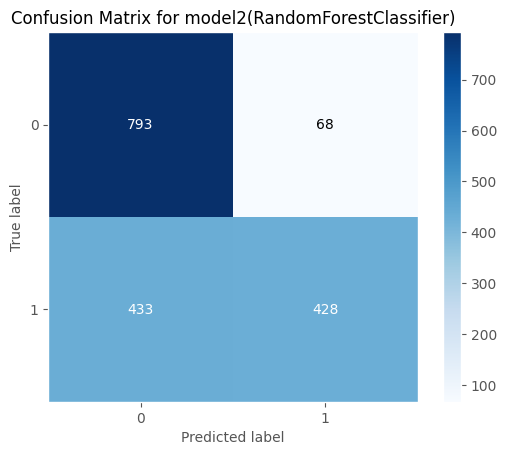

In [112]:
#confussion matrix.
skplt.metrics.plot_confusion_matrix(test_y, model2_predict, normalize=False, title = 'Confusion Matrix for model2(RandomForestClassifier)')
plt.show()

In [113]:
print(f"This is the precision score of that metrics  : {precision_score(test_y,model2_predict)}")
print(f"This is the Recall score of that metrics  : {recall_score(test_y,model2_predict)}")

This is the precision score of that metrics  : 0.8629032258064516
This is the Recall score of that metrics  : 0.49709639953542395


In [114]:
#learning curve
train_size,train_score,test_score=learning_curve(model2,x_train,y_train,scoring='accuracy',train_sizes=np.linspace(0.01,1,50),n_jobs=-1)
train_mean=train_score.mean(axis=1)
train_std=train_score.std(axis=1)
test_mean=test_score.mean(axis=1)
test_std=test_score.std(axis=1)

fig=go.Figure()
fig.add_trace(go.Scatter(x=train_size,y=train_mean,name='Training score'))
fig.add_trace(go.Scatter(x=train_size,y=test_mean,name ='Testing score (cv)'))
fig.add_trace(go.Scatter(x = train_size,y = train_mean + train_std,line_color = 'gray',showlegend=False,name = 'Upper band',opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = train_mean - train_std , line_color = 'gray', fill = 'tonexty', name = 'Lower band', showlegend=False, opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = test_mean + test_std,  line_color = 'gray',  name = 'upper band',  showlegend=False,  opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = test_mean-test_std, line_color = 'gray', fill = 'tonexty', name = 'Lower band', showlegend=False, opacity = 0.5),)
fig.update_layout(title_text='LEARNING CURVE WITH VARIOUS TRAINING SHAPE',title_x=0.5,title_y=0.85)
fig.update_yaxes(title_text='MODEL SCORE')
fig.update_xaxes(title_text='SHAPE OF TRAINING DATASET')
fig.show()

After 3500 data of training dataset the learning curve is moving constantly .

#### 2. Cross- Validation & Hyperparameter Tuning

In [115]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_dict={
 'max_features': ['sqrt'],
 'n_estimators': [15,20,25,300],
 'max_depth':[10,20,30,40],
 }
model2_grid_search = GridSearchCV(model2, param_dict, cv = 5, scoring='accuracy')
# Fit the Algorithm
model2_grid_search.fit(x_train,y_train)
# Predict on the model
print(f"\n\nBest parameter for this model -  {model2_grid_search.best_params_}")
print(f"Best score for this model -  {model2_grid_search.best_score_ *100}")



Best parameter for this model -  {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}
Best score for this model -  90.78408239700376


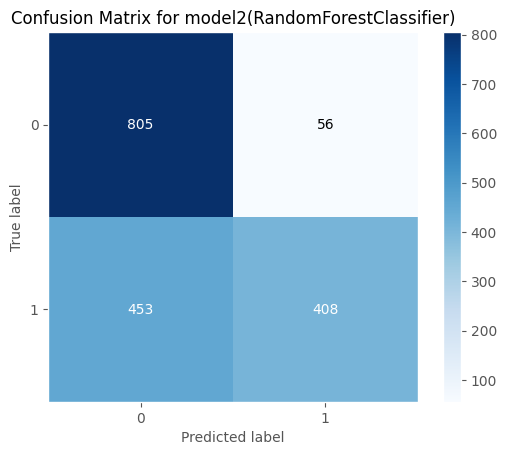

In [116]:
#after hypermetertuning we are going to use this tuned hypermeter into model training
model_2=RandomForestClassifier(bootstrap= False,max_features= 'sqrt', n_estimators= 500,max_depth=30)
model_2.fit(x_train,y_train)
model_2_predict=model_2.predict(test_x)
skplt.metrics.plot_confusion_matrix(test_y, model_2_predict, normalize=False, title = 'Confusion Matrix for model2(RandomForestClassifier)')
plt.show()

In [117]:
#this is the classification report for model 2
print(classification_report(test_y,model_2_predict))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76       861
           1       0.88      0.47      0.62       861

    accuracy                           0.70      1722
   macro avg       0.76      0.70      0.69      1722
weighted avg       0.76      0.70      0.69      1722



***`ROC-AUC`***

In [118]:
y_scores = model2.predict_proba(test_x)
fpr_r, tpr_r, threshold = roc_curve(test_y, y_scores[:, 1])
roc_auc_r = auc(fpr_r, tpr_r)
fig=go.Figure()
fig.add_trace(go.Scatter(x=[0,1],y=[0,1],name="Normal line",mode='lines'))
fig.add_trace(go.Scatter(x=fpr_r,y=tpr_r,fill='tonexty',mode='none',name=f"RandomForestClassifier-ROC-AUC : {round(roc_auc_r,2)}"))
fig.update_layout(title_text="ROC curve of Random Forest",
                  title_x=0.4,title_y=0.85,
                  title_font=dict(
                     color="blue",
                     family='bold',
                     size=17
                  ))
fig.update_xaxes(
    title_text="False Positive Rate",
    title_font=dict(
        color='blue',
        family='bold',
        size=14
    )
)
fig.update_yaxes(
    title_text="True Positive Rate",
    title_font=dict(
        color='blue',
        family='bold',
        size=14
    )
)
fig.show()

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV:** GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

1. macro Precision = 0.80
2. macro Recall = 0.82

Here recall and precision going equavalent to each other .this is positive improvment of model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

here we can see the Recall and Precision  of confusion metrics is not as good as we want therefore we have to do **Precision Recall Tradoff** at the end of model selectioin

### ML Model - 3 : **`DecisionTreeClassifier`**

In [119]:
# ML Model - 3 Implementation
model3=DecisionTreeClassifier()
# Fit the Algorithm
model3.fit(x_train,y_train)
# Predict on the model
model3_predict=model3.predict(test_x)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [120]:
# Visualizing evaluation Metric Score chart
print(f"---------------------------------This is the score of model1 : {accuracy_score(test_y,model3_predict)} ---------------------------------")

---------------------------------This is the score of model1 : 0.6382113821138211 ---------------------------------


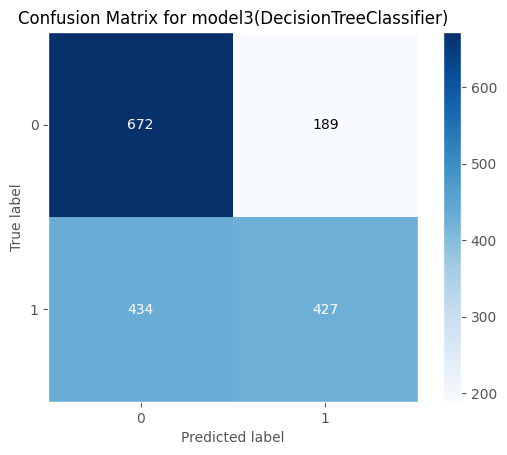

In [121]:
#confussion matrix.
skplt.metrics.plot_confusion_matrix(test_y, model3_predict, normalize=False, title = 'Confusion Matrix for model3(DecisionTreeClassifier)')
plt.show()

In [122]:
print(f"This is the precision score of that metrics  : {precision_score(test_y,model3_predict)}")
print(f"This is the Recall score of that metrics  : {recall_score(test_y,model3_predict)}")

This is the precision score of that metrics  : 0.6931818181818182
This is the Recall score of that metrics  : 0.4959349593495935


#### 2. Cross- Validation & Hyperparameter Tuning

In [123]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params =  {
    'criterion':['gini','entropy'],
    'min_samples_leaf': [1, 2],
    'max_depth': [1, 2, 3 ,None]
}
grid = GridSearchCV(estimator=model3,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2,
                    error_score='raise')
# Fit the Algorithm
grid.fit(x_train, y_train)
# Predict on the model
print(f"Best score : {grid.best_score_}")
print(f"Best parameters : {grid.best_params_}")

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_

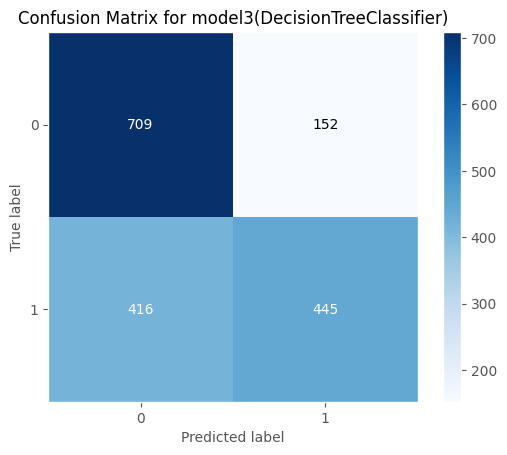

In [124]:
model_3=DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=1)
model_3.fit(x_train,y_train)
model_3_predict=model_3.predict(test_x)
#confussion matrix.
skplt.metrics.plot_confusion_matrix(test_y, model_3_predict, normalize=False, title = 'Confusion Matrix for model3(DecisionTreeClassifier)')
plt.show()

In [125]:
#this is the classification report for model 2
print(classification_report(test_y,model_2_predict))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76       861
           1       0.88      0.47      0.62       861

    accuracy                           0.70      1722
   macro avg       0.76      0.70      0.69      1722
weighted avg       0.76      0.70      0.69      1722



In [126]:
print(f"This is the precision score of that metrics  : {precision_score(test_y,model_3_predict)}")
print(f"This is the Recall score of that metrics  : {recall_score(test_y,model_3_predict)}")

This is the precision score of that metrics  : 0.7453936348408711
This is the Recall score of that metrics  : 0.5168408826945412


In [127]:
#learning cureve
#learning curve
train_size,train_score,test_score=learning_curve(model_3,x_train,y_train,scoring='accuracy',train_sizes=np.linspace(0.01,1,50),n_jobs=-1)
train_mean=train_score.mean(axis=1)
train_std=train_score.std(axis=1)
test_mean=test_score.mean(axis=1)
test_std=test_score.std(axis=1)

fig=go.Figure()
fig.add_trace(go.Scatter(x=train_size,y=train_mean,name='Training score'))
fig.add_trace(go.Scatter(x=train_size,y=test_mean,name ='Testing score (cv)'))
fig.add_trace(go.Scatter(x = train_size,y = train_mean + train_std,line_color = 'gray',showlegend=False,name = 'Upper band',opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = train_mean - train_std , line_color = 'gray', fill = 'tonexty', name = 'Lower band', showlegend=False, opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = test_mean + test_std,  line_color = 'gray',  name = 'upper band',  showlegend=False,  opacity = 0.5),)
fig.add_trace(go.Scatter(x = train_size, y = test_mean-test_std, line_color = 'gray', fill = 'tonexty', name = 'Lower band', showlegend=False, opacity = 0.5),)
fig.update_layout(title_text='LEARNING CURVE WITH VARIOUS TRAINING SHAPE',title_x=0.5,title_y=0.85)
fig.update_yaxes(title_text='MODEL SCORE')
fig.update_xaxes(title_text='SHAPE OF TRAINING DATASET')
fig.show()

Here we can see that the testing score is increasing gradualy this show that if we increase the data in training the testing score will also improve .

In [128]:
y_scores = model3.predict_proba(test_x)
fpr_d, tpr_d, threshold = roc_curve(test_y, y_scores[:, 1])
roc_auc_d = auc(fpr_d, tpr_d)
fig=go.Figure()
fig.add_trace(go.Scatter(x=[0,1],y=[0,1],name="Normal line",mode='lines'))
fig.add_trace(go.Scatter(x=fpr_d,y=tpr_d,fill='tonexty',mode='none',name=f"DecisionTreeClassifier-ROC-AUC : {round(roc_auc_d,2)}"))
fig.update_layout(title_text="ROC curve of Decision Tree",
                  title_x=0.4,title_y=0.85,
                  title_font=dict(
                     color="blue",
                     family='bold',
                     size=17
                  ))
fig.update_xaxes(
    title_text="False Positive Rate",
    title_font=dict(
        color='blue',
        family='bold',
        size=14
    )
)
fig.update_yaxes(
    title_text="True Positive Rate",
    title_font=dict(
        color='blue',
        family='bold',
        size=14
    )
)
fig.show()

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV:** GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes here we can see the improvment in score and in metrics.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Cnofusion metrics , because it show the precision and recall of the model which is important for our prediction . and our aim is to improve more Recall value of model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [129]:
test = PrettyTable(['Sl. No.','Classification Model','Test Recall (%)'])
test.add_row(['1','K Nearest Neighbors',recall_score(test_y,model1_predict)*100])
test.add_row(['2','Random Forest',recall_score(test_y,model2_predict)*100])
test.add_row(['3','Decision Tree',recall_score(test_y,model3_predict)*100])
print(test)

+---------+----------------------+--------------------+
| Sl. No. | Classification Model |  Test Recall (%)   |
+---------+----------------------+--------------------+
|    1    | K Nearest Neighbors  | 55.400696864111495 |
|    2    |    Random Forest     | 49.70963995354239  |
|    3    |    Decision Tree     | 49.59349593495935  |
+---------+----------------------+--------------------+


**`The recall score here is almost same for each model`**

In [130]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=[0,1],y=[0,1],name="Normal line",mode='lines'))
fig.add_trace(go.Scatter(x=fpr,y=tpr,fill='tonexty',mode='none',name=f"KNeighborsClassifier-ROC-AUC : {round(roc_auc,2)}"))
fig.add_trace(go.Scatter(x=fpr_r,y=tpr_r,fill='tonexty',mode='none',name=f"RandomForestClassifier-ROC-AUC : {round(roc_auc_r,2)}"))
fig.add_trace(go.Scatter(x=fpr_d,y=tpr_d,fill='tonexty',mode='none',name=f"DecisionTreeClassifier-ROC-AUC : {round(roc_auc_d,2)}"))

fig.add_annotation(x=fpr[4], y=tpr[4],text="KNeighborsClassifier",bgcolor="violet",showarrow=True,arrowhead=1)
fig.add_annotation(x=fpr_r[45], y=tpr_r[45],text="Random Forest",bgcolor="violet",showarrow=True,arrowhead=1)
fig.add_annotation(x=fpr_d[1], y=tpr_d[1],text="Decisioin Tree",bgcolor="violet",showarrow=True,arrowhead=1)

fig.update_layout(title_text='ROC - CURVE',title_x=0.4,title_y=0.85,title_font=dict(color='blue',family='bold',size=17))
fig.update_xaxes(title_text='False Positive Rate',title_font=dict(color='blue',family='bold',size=17))
fig.update_yaxes(title_text='True Positive Rate',title_font=dict(color='blue',family='bold',size=17))

fig.show()

**`No perfect models here, but all of them are far away from the baseline (unusable model). The random forest algorithm is the best, with a 0.82 AUC score.`**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

`Explaining the Model using `: **`SHAP`**

EXTRACTING THE FEATURE IMPORTANCE WITH SHAP ...

In [131]:
#prepearing explainer

explainer = TreeExplainer(model_2)
sv = explainer(x_train[:1000])

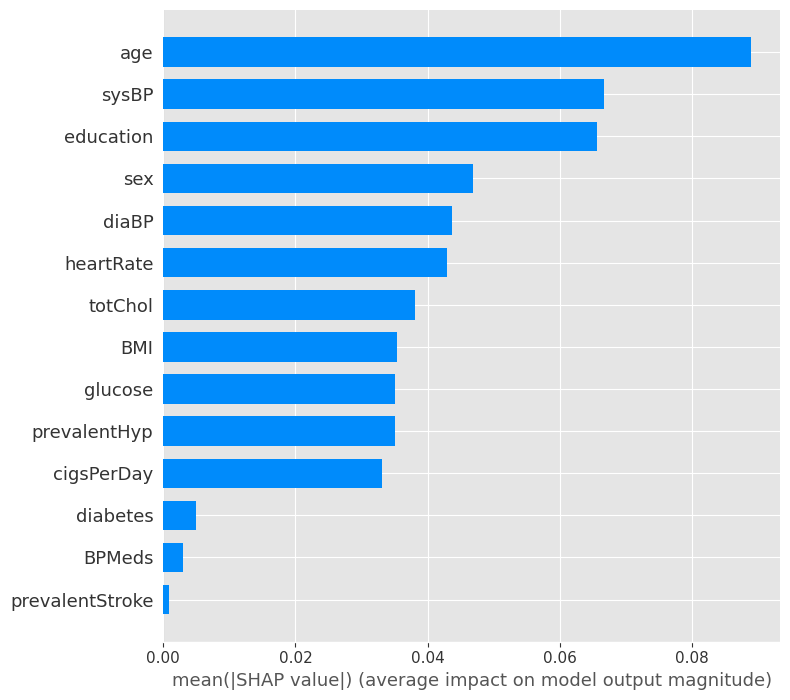

In [132]:
#Let’s see which feature are the most important when determining TenYearCHD:
shap.summary_plot(sv.values[:,:,1], x_train[:1000],cmap = "plasma",plot_type="bar")

Feature importance
1. The age,Blood pressure out as the driving factor for TenYearCHD.
2. and diabetes and prevalentStroke is least afecting factor for TenYearCHD.

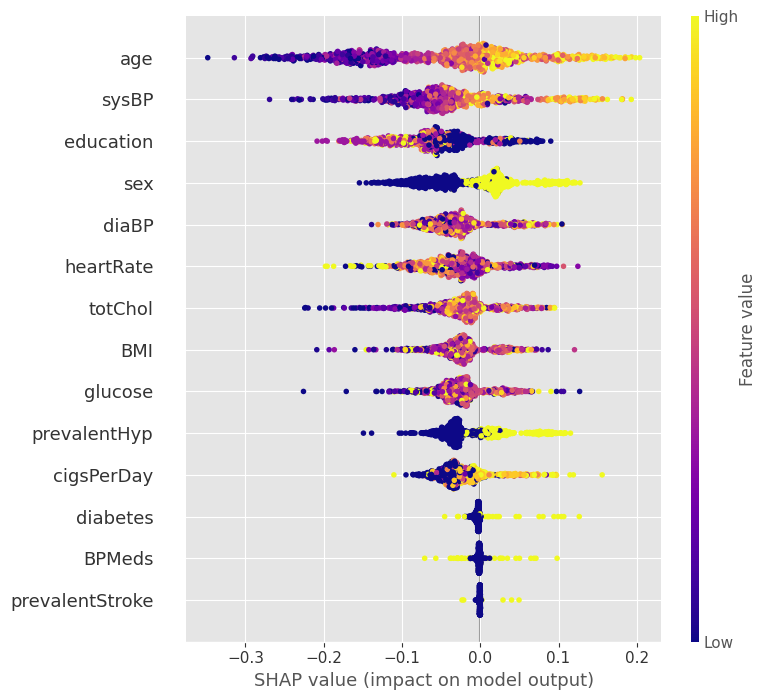

In [133]:
#we can see which feature positively or negatively influences the model.
shap.summary_plot(sv.values[:,:,1], x_train[:1000],cmap = "plasma")

We see that as age increases, its effect on the model is more positive. The same is true for heartRate and Blood pressure feature. The totalChol, education and BMI features are a bit tricky with a cluster of mixed points around the center.

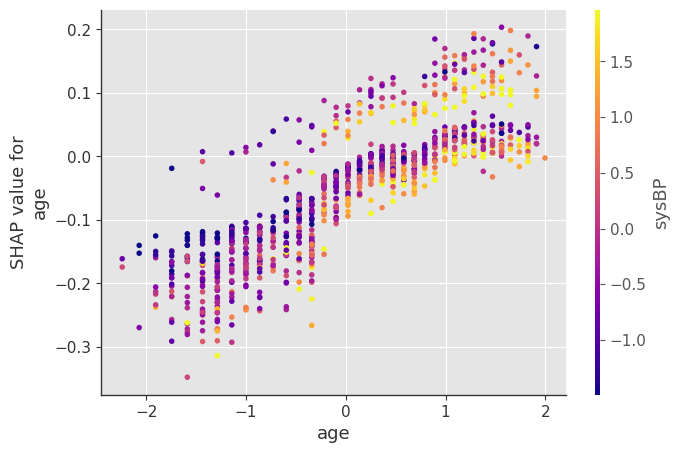

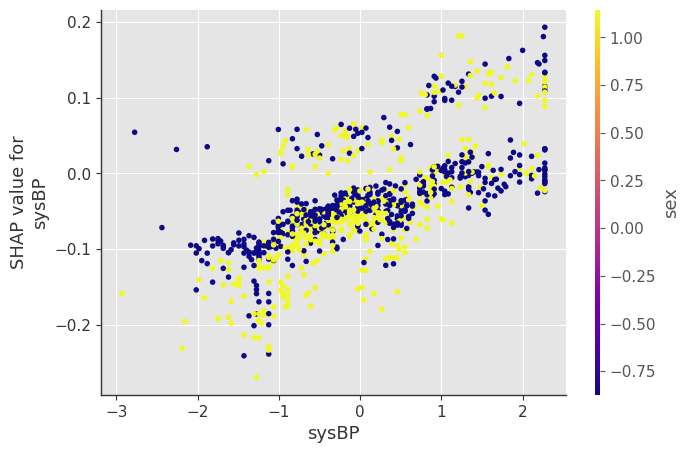

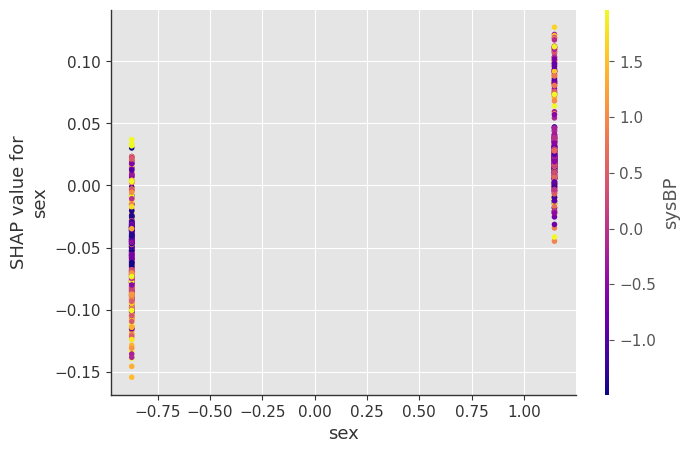

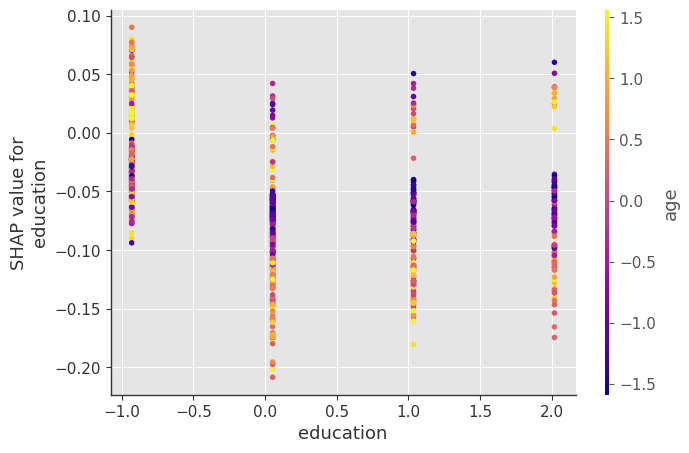

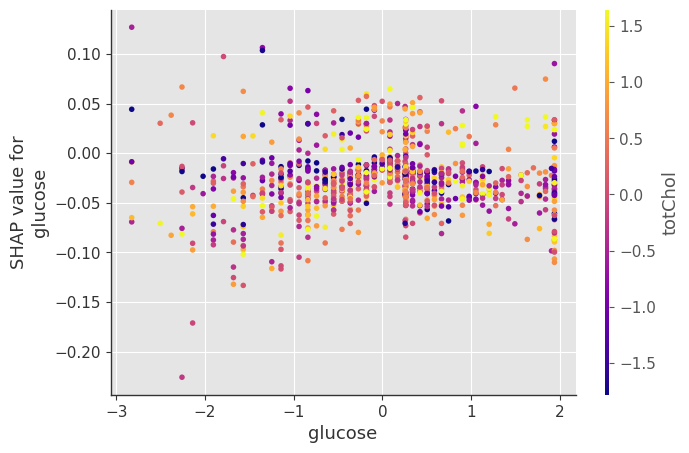

(None,)

In [134]:
#We can get a deeper insight into each feature’s effect on the entire dataset with dependence plots.
shap.dependence_plot('age',sv.values[:,:,1],x_train[:1000],cmap = "plasma"),
shap.dependence_plot('sysBP',sv.values[:,:,1],x_train[:1000],cmap = "plasma"),
shap.dependence_plot('sex',sv.values[:,:,1],x_train[:1000],cmap = "plasma"),
shap.dependence_plot('education',sv.values[:,:,1],x_train[:1000],cmap = "plasma"),
shap.dependence_plot('glucose',sv.values[:,:,1],x_train[:1000],cmap = "plasma"),


It seems that the 'age' interacts with the clarity of the diamonds much stronger than other features because of it has linierly ploted point.followed by 'Blood pressure' and others.

In [135]:
explain_value = Explanation(sv.values[:,:,1],
                  sv.base_values[:,1],
                  data=x_train.values,
                  feature_names=x_train.columns)

ANALYSING THE MODEL PREDICTION BELOW...

In [136]:
#here we providing the index in which we want to analys the model prediction with features.
idx = 59

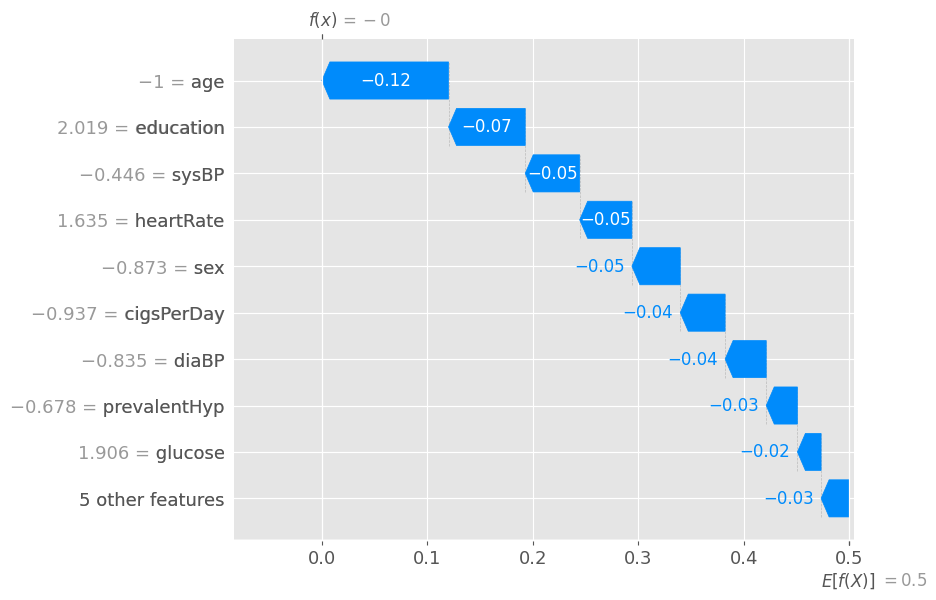

In [137]:
#let’s explain the random prob of that index we picked out with a waterfall plot
shap.waterfall_plot(explain_value[idx])

The E[f(x)] = 0.5 is the mean prediction of TenYearCHD for the train set.The bars represent how each feature property shifted the price from the mean prediction. The red bars represent positive shifts; the blue bars represent negative shifts.

* for index 59 - positivly increament in prob of features where totChol is 0.07 highest and then BMI, cigsperday and others.
* And the prediction is 1 (yes)

In [138]:
shap.initjs()
shap.force_plot(explain_value[idx],plot_cmap = "PkYg")

This is just an ordered, organized version of waterfall plots. All negative and positive bars are grouped to either side of the predicted price. Again, the base value shows the mean price, and the bars show how much each feature property shifts that value.

Answer Here.

# **Conclusion**

* Age, Blood pressure, Sex thease three features are involving heigher in predicion of CHD.
* Neither model has a good recall score. Therefore we can say that our model training is not on a point. So we can say that none of our models is suitable for business implementation .

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***